In [1]:
import numpy as np
import pandas as pd
import glob
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table
import itertools
from astroquery.simbad import Simbad
from utils import PLOT_PARAMS
from astropy import constants as const
from matplotlib import colors
PLOT_PARAMS()
import thejoker as tj
import random
random.seed(42) 
from scipy.stats import gaussian_kde


from datetime import date
today=date.today()
DATE =today.strftime("%m_%d_%y")
print(DATE)
import pickle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

plt.rcParams['figure.facecolor'] = 'white'
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

vlt = EarthLocation.of_site('paranal')  # the easiest way... but requires internet

09_24_25


In [2]:
df_rich = pd.read_pickle('../../lithium/data/gfinal_rich.pkl')

In [3]:
galah = Table.read('../../lithium/data/GALAH_DR3_main_allstar_v2.fits').to_pandas()

In [4]:
galah_vac = Table.read('../../lithium/data/GALAH_DR3_VAC_ages_v2.fits').to_pandas()

In [70]:
apogee_dr16 = Table.read('../../lithium/data/allStarLite-r12-l33.fits')
apogee_dr16.convert_bytestring_to_unicode()
apogee_dr16 = apogee_dr16[(apogee_dr16['TEFF']>0) & (apogee_dr16['LOGG']>-9000.) ]


In [82]:
# print(min(apogee_dr16[apogee_dr16['J']>-10]['J']),max(apogee_dr16[apogee_dr16['J']>-10]['J']))
min(galah[galah.sobject_id.isin(rv_df.sobject_id)]['j_m']),max(galah[galah.sobject_id.isin(rv_df.sobject_id)]['j_m'])

# _=plt.hist(apogee_dr16[apogee_dr16['J']>-10]['J'],bins='auto')

(7.456999778747559, 11.829999923706055)

In [69]:
# for i in galah.keys():
#     print(i)

star_id
sobject_id
dr2_source_id
dr3_source_id
survey_name
field_id
flag_repeat
wg4_field
wg4_pipeline
flag_sp
teff
e_teff
irfm_teff
irfm_ebv
irfm_ebv_ref
logg
e_logg
fe_h
e_fe_h
flag_fe_h
fe_h_atmo
vmic
vbroad
e_vbroad
chi2_sp
alpha_fe
e_alpha_fe
nr_alpha_fe
flag_alpha_fe
flux_A_Fe
chi_A_Fe
Li_fe
e_Li_fe
nr_Li_fe
flag_Li_fe
C_fe
e_C_fe
nr_C_fe
flag_C_fe
O_fe
e_O_fe
nr_O_fe
flag_O_fe
Na_fe
e_Na_fe
nr_Na_fe
flag_Na_fe
Mg_fe
e_Mg_fe
nr_Mg_fe
flag_Mg_fe
Al_fe
e_Al_fe
nr_Al_fe
flag_Al_fe
Si_fe
e_Si_fe
nr_Si_fe
flag_Si_fe
K_fe
e_K_fe
nr_K_fe
flag_K_fe
Ca_fe
e_Ca_fe
nr_Ca_fe
flag_Ca_fe
Sc_fe
e_Sc_fe
nr_Sc_fe
flag_Sc_fe
Sc2_fe
e_Sc2_fe
nr_Sc2_fe
flag_Sc2_fe
Ti_fe
e_Ti_fe
nr_Ti_fe
flag_Ti_fe
Ti2_fe
e_Ti2_fe
nr_Ti2_fe
flag_Ti2_fe
V_fe
e_V_fe
nr_V_fe
flag_V_fe
Cr_fe
e_Cr_fe
nr_Cr_fe
flag_Cr_fe
Cr2_fe
e_Cr2_fe
nr_Cr2_fe
flag_Cr2_fe
Mn_fe
e_Mn_fe
nr_Mn_fe
flag_Mn_fe
Co_fe
e_Co_fe
nr_Co_fe
flag_Co_fe
Ni_fe
e_Ni_fe
nr_Ni_fe
flag_Ni_fe
Cu_fe
e_Cu_fe
nr_Cu_fe
flag_Cu_fe
Zn_fe
e_Zn_fe
nr_Zn_fe
flag_Zn_

In [5]:
rv_df = pd.read_csv('rv_df.csv')

In [6]:
comb_df = pd.read_csv('combined_rvs.csv')


In [7]:
binary_list_113 = [9, 11, 16, 18, 19, 23,] # old: 1, 4, 5, 7, 9, 11, 16, 18, 19, 21, 23  
binary_list_112 = [6, 7, 23] #old: 5, 6, 7, 23 #13 removed because of dipper star

In [8]:
def print_latex(df,program):
    df = df[df.program==program]
    cols = ['RG_id','sobject_id','dr3_source_id','obj_name', 'Li_val', 'fe_h', 'logg', 'vbroad' ]#, 'ruwe']
    return df[cols]
    
def format_float_latex_2f(x):
    return f"{x:.2f}" # Format to two decimal places


latex_1 = print_latex(rv_df, 113)
print(latex_1.to_latex(index=False,float_format="{:.2f}".format))


\begin{tabular}{rrrlrrrr}
\toprule
RG_id & sobject_id & dr3_source_id & obj_name & Li_val & fe_h & logg & vbroad \\
\midrule
1 & 140806001701013 & 5909827209206002688 & UCAC4 139-176959 & 3.32 & -0.43 & 1.82 & 18.76 \\
2 & 170802003201248 & 5911546192556778624 & UCAC4 143-204046 & 1.56 & -0.08 & 1.75 & 7.02 \\
3 & 150429004102159 & 6043491023860004096 & 2MASS J16094423-2557437 & 2.55 & -0.79 & 1.33 & 15.34 \\
4 & 170602003701360 & 6118276540605054208 & 2MASS J14255395-3724226 & 2.95 & -0.79 & 1.42 & 10.95 \\
5 & 170416004301008 & 6221353316163376768 & UCAC4 308-077592 & 4.80 & -1.67 & 0.77 & 6.92 \\
6 & 170906002101305 & 6635979460239055360 & UCAC4 160-209706 & 2.67 & -0.45 & 1.71 & 27.10 \\
7 & 160521004801082 & 6668577437377879424 & UCAC4 212-183136 & 4.23 & -1.40 & 1.49 & 15.18 \\
8 & 170517004501165 & 6685651336832264448 & UCAC3 92-415399 & 3.84 & -0.51 & 1.61 & 6.38 \\
9 & 140707003101315 & 2622883652325300992 & ATO J337.2658-06.4234 & 1.54 & -0.80 & 2.84 & 12.10 \\
10 & 161013001

In [9]:
def load_samples(df0,program,binary_list):
    stat_dict = {}        
    version = 1
    
    df = df0[df0.program==program]
    
    dtemp = {'RG_id':[],
             'P16':[], 'P50':[], 'P84':[],
             'e16':[], 'e50':[], 'e84':[],
             'K16':[], 'K50':[], 'K84':[] }
    
    for i, row in df.iterrows():
        RG = row.RG_id
        print(RG)
        
        if RG not in binary_list:
            continue
        fname = '../joker_samples/%s_%s_mcmc_%s.pickle'%(program,RG,version)
        
        with open(fname, 'rb') as handle:
            mcmc_samples = pickle.load(handle)
        
        if mcmc_samples == -999:
            Ps, es, Ks = np.nan, np.nan, np.nan
            dtemp['P16'].append(np.nan)
            dtemp['P50'].append(np.nan)
            dtemp['P84'].append(np.nan)
            dtemp['e16'].append(np.nan)
            dtemp['e50'].append(np.nan)
            dtemp['e84'].append(np.nan)

            dtemp['K16'].append(np.nan)
            dtemp['K50'].append(np.nan)
            dtemp['K84'].append(np.nan)

        else:
            Ps = mcmc_samples['P'].value
            es = mcmc_samples['e'].value
            Ks = mcmc_samples['K'].value

            dtemp['P16'].append(np.percentile(Ps, 16))
            dtemp['P50'].append(np.percentile(Ps, 50))
            dtemp['P84'].append(np.percentile(Ps, 84))

            dtemp['e16'].append(np.percentile(es, 16))
            dtemp['e50'].append(np.percentile(es, 50))
            dtemp['e84'].append(np.percentile(es, 84))

            dtemp['K16'].append(np.percentile(Ks, 16))
            dtemp['K50'].append(np.percentile(Ks, 50))
            dtemp['K84'].append(np.percentile(Ks, 84))
            
        dtemp['RG_id'].append(RG)

    dtemp = pd.DataFrame(dtemp)
    
    dtemp = pd.merge(dtemp, df)
    
    return dtemp

temp1 = load_samples(rv_df, 112, binary_list_112)
temp2 = load_samples(rv_df, 113, binary_list_113)


1
2
4
5
6
7
14
23
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [10]:
table1 = pd.concat([temp1, temp2])

# get mass from galah
table1 = pd.merge(table1, galah_vac[['sobject_id','m_act_bstep','e_m_act_bstep','radius_bstep','e_radius_bstep']], left_on='sobject_id', right_on='sobject_id')

table1.loc[(table1.RG_id==13) & (table1.program==112),'m_act_bstep']    = 1.070 #from Gaia DR3 FLAME
table1.loc[(table1.RG_id==13) & (table1.program==112),'radius_bstep']   = 2.0731 #from Gaia DR3 FLAME
table1.loc[(table1.RG_id==13) & (table1.program==112),'e_m_act_bstep']  = 0.04 #from Gaia DR3 FLAME
table1.loc[(table1.RG_id==13) & (table1.program==112),'e_radius_bstep'] = 0.05 #from Gaia DR3 FLAME

# table1.loc[table1.sobject_id==190212001601338,'m_act_bstep']    = 1.070 #from Gaia DR3 FLAME
# table1.loc[table1.sobject_id==190212001601338,'radius_bstep']   = 2.0731 #from Gaia DR3 FLAME
# table1.loc[table1.sobject_id==190212001601338,'e_m_act_bstep']  = 0.04 #from Gaia DR3 FLAME
# table1.loc[table1.sobject_id==190212001601338,'e_radius_bstep'] = 0.05 #from Gaia DR3 FLAME




In [11]:
def semi_major_axis(M1, M2, P):
    '''
    M1 : in solar masses
    P : in days
    M2 : in Mjup
    
    @return a: m
    
    '''
    G = const.G
    M1 = (M1*u.Msun).to(u.kg)
    M2 = (M2*u.Mjup).to(u.kg)
    M = (M1+M2)
    P = (P*u.day).to(u.second)
    a = (G*M*P**2/(4*np.pi**2))**(1./3)
    
    return a


In [12]:
def v_max(df):
    '''
    M1 in solar units
    M2 in Mjup units
    a in AU
    
    return v_max in km/s
    
    '''
    M1, M2 = df.m_act_bstep.to_numpy(), df.Mj50.to_numpy()
    a, e = df.a50.to_numpy(), df.e50.to_numpy()
    
    M1 = (M1*u.Msun).to(u.kg)
    M2 = (M2*u.Mjup).to(u.kg)
    M = (M1+M2)
    a = (a*u.au).to(u.m)
    M = (M1+M2)
    G = const.G

    v = ((G*M/a) * (2./(1-e) - 1))
    v = [np.sqrt(i.value) for i in v]
    v = [(i*u.m/u.s).to(u.km/u.s).value for i in v]
    
    df['v_max'] = v
    
    return df

In [13]:

def v_orb(df):
    '''
    a: in meters
    P: in days
    
    v_orb : in km/s
    
    '''
    a, P = df.a50.to_numpy(), df.P50.to_numpy()
    
    a = (a*u.au).to(u.m)
    P = (P*u.day).to(u.second)

    v = 2*np.pi*a/P
    v = [i.to(u.km/u.s).value for i in v]
    df['v_orb'] = v
    return df


In [14]:
def msini_func(K, P, e, Mstar):
    '''
    Get Mp sin(i), the minimum mass of the companion.
    @input:
        K: semi-amplitude in km/s
        P: period in days
        e: eccentricity
        M: mass of the star in solar masses
    
    @return:
        Msini: Msini in kg
    '''
    from scipy import optimize
    # define constants
    pi = np.pi
    G  = const.G
    
    # convert units to SI units
    K = abs((K*(u.km/u.second)).to(u.meter/u.second))
    P = (P*u.day).to(u.second)
    Mstar = (Mstar*u.M_sun).to(u.kg)
    e = e*u.dimensionless_unscaled
    
    # if Mp << Mstar:
    # Msini = (Mstar)**(2./3.) * np.sqrt(1-e**2.) * K * (P/(2*pi*G))**(1./3.)
    
    # else:
    a     = np.sqrt(1-e**2.) * K * (P/(2*pi*G))**(1./3.)
    
    def func(x, a, Mstar):
        return x - (Mstar + x)**(2./3.) * a # x = Msini

    initial_guess = 0.1*u.Msun.to(u.kg)
    
    sol   = optimize.root(func, initial_guess, args=(a.value, Mstar.value) )
    Msini = sol.x
    
    #root  = brentq(func, 0.1, Msun , args=(a.value, Mstar.value))
    
    return Msini, sol.success


In [15]:
def clean_up(df):
    galah_id = df.sobject_id.values[0]
    dtemp    = comb_df[comb_df.GALAH_ID==galah_id]
    
    time = dtemp['time'].to_numpy()
    rv   = dtemp['rv'].to_numpy()
    err  = dtemp['rv_err'].to_numpy()
    source  = dtemp['source'].to_numpy()
    
    
    return time, rv, err, source, dtemp

clean_up(rv_df[(rv_df.RG_id==1) & (rv_df.program==112)])


(array([2460341.53519178, 2460389.56581584, 2460371.51348333,
        2460303.84853621, 2457030.1328125 ]),
 array([53.7010931 , 53.79850384, 53.71577284, 53.45877222, 53.55199814]),
 array([0.03563532, 0.0194216 , 0.01884311, 0.00615718, 0.072     ]),
 array(['ESPRESSO', 'ESPRESSO', 'ESPRESSO', 'ESPRESSO', 'GALAH'],
       dtype=object),
            GALAH_ID          time         rv    rv_err    source
 24  150107004201104  2.460342e+06  53.701093  0.035635  ESPRESSO
 25  150107004201104  2.460390e+06  53.798504  0.019422  ESPRESSO
 26  150107004201104  2.460372e+06  53.715773  0.018843  ESPRESSO
 27  150107004201104  2.460304e+06  53.458772  0.006157  ESPRESSO
 28  150107004201104  2.457030e+06  53.551998  0.072000     GALAH)

In [17]:
def get_msini(df0,program,binary_list):
    version = 1
    df = df0[df0.program==program]

    dtemp = {'RG_id':[], 'Mj16':[], 'Mj50':[], 'Mj84':[], 
             'a16': [], 'a50':[], 'a84':[]
            }
    for i, row in df.iterrows():
        RG = row.RG_id
        
        if RG not in binary_list:
            continue
        fname = '../mcmc/%s_%s_mcmc_%s.pickle'%(program,RG,version)

        with open(fname, 'rb') as handle:
            mcmc_samples = pickle.load(handle)

        Ks = mcmc_samples['K'].value
        Ps = mcmc_samples['P'].value
        es = mcmc_samples['e'].value
        
        Mstar_val  = np.array(df[(df.RG_id==RG)].m_act_bstep)[0]
        eMstar_val = np.array(df[(df.RG_id==RG)].e_m_act_bstep)[0]
        
        if str(Mstar_val) == 'nan':
            if df.sobject_id.values[0] == 190212001601338: # gaia DR3 3217773074208416640
                Mstar_val = 1.070
               
        Mjup = np.empty(len(Ks))
        a_au = np.empty(len(Ks))
        
        Mstar_samples = np.random.normal(Mstar_val, eMstar_val, size=len(Ks))
        
        for i in range(len(Ks)):
            K, P, e, Mstar = Ks[i], Ps[i], es[i], Mstar_samples[i]
            Msini, success = msini_func(K, P, e, Mstar)
            Msini_jup   = Msini/u.M_jup.to(u.kg)
            Mjup[i] = Msini_jup[0]
            
            a_m  = semi_major_axis(M1=Mstar, M2=Msini_jup, P=P)

            a_au[i] = a_m.to(u.au).value
        
        dtemp['RG_id'].append(RG)
        
        dtemp['Mj16'].append(np.percentile(Mjup, 16))
        dtemp['Mj50'].append(np.percentile(Mjup, 50))
        dtemp['Mj84'].append(np.percentile(Mjup, 84))
        
        dtemp['a16'].append(np.percentile(a_au, 16))
        dtemp['a50'].append(np.percentile(a_au, 50))
        dtemp['a84'].append(np.percentile(a_au, 84))

    dtemp = pd.DataFrame(dtemp)
    dtemp = pd.merge(dtemp, df)
    
    return dtemp

mass_temp1 = get_msini(table1, 112, binary_list_112)
mass_temp2 = get_msini(table1, 113, binary_list_113)

table2 = pd.concat([mass_temp1, mass_temp2])

In [18]:
table4 = table2.copy()

In [19]:
table4 = v_max(table4)
table4 = v_orb(table4)

# table4.to_csv('table4.csv',index=False)

In [20]:
plt.rcParams['figure.facecolor'] = 'white'


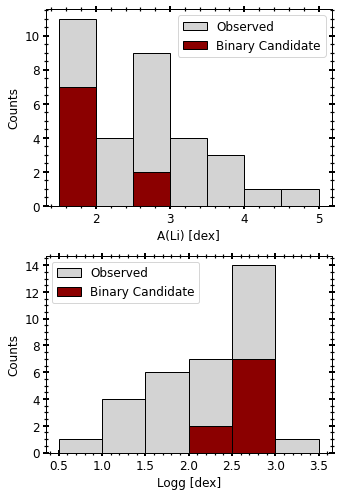

In [21]:
PLOT_PARAMS(LS=12,SIZE=12)
plt.figure(figsize=(5,7))
plt.subplot(211)
bins=np.arange(1.5, 5.5, 0.5)
d1 = rv_df[(rv_df.program==112) & (rv_df.RG_id.isin(binary_list_112))]#.Li_val.values
d2 = rv_df[(rv_df.program==113) & (rv_df.RG_id.isin(binary_list_113))]#.Li_val.values
both_galah = pd.concat([d1, d2])

plt.hist(rv_df.Li_val.values, bins=bins, label='Observed',color='lightgrey', ec='k')
# plt.hist(rv_df[(rv_df.program==112) & (rv_df.RG_id.isin(binary_list_112))].Li_val.values, bins=bins, label='Observed',color='lightgrey', ec='k')
plt.hist(both_galah.Li_val.values, bins=bins, label='Binary Candidate',color='darkred', ec='k')
plt.xlabel('A(Li) [dex]')
plt.ylabel('Counts')
plt.legend()

plt.subplot(212)
bins=np.arange(0.5, 4., 0.5)
d1 = rv_df[(rv_df.program==112) & (rv_df.RG_id.isin(binary_list_112))]#.Li_val.values
d2 = rv_df[(rv_df.program==113) & (rv_df.RG_id.isin(binary_list_113))]#.Li_val.values
both_galah = pd.concat([d1, d2])

plt.hist(rv_df.logg.values, bins=bins, label='Observed',color='lightgrey', ec='k')
# plt.hist(rv_df[(rv_df.program==112) & (rv_df.RG_id.isin(binary_list_112))].Li_val.values, bins=bins, label='Observed',color='lightgrey', ec='k')
plt.hist(both_galah.logg.values, bins=bins, label='Binary Candidate',color='darkred', ec='k')
plt.xlabel('Logg [dex]')
plt.ylabel('Counts')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('../plots/binary_fraction_%s.png'%DATE,bbox_inches='tight',dpi=150)


In [22]:
def hrd():
    PLOT_PARAMS(SIZE=12, LS=12)
    from matplotlib.colors import LogNorm

    good_galah = galah[(galah.flag_sp<=1) & (galah.flag_fe_h==0)]
    x, y  = good_galah.teff.values, good_galah.logg.values
    
    bins = 180
    
    plt.figure(figsize=(5,4))
    
    h = plt.hist2d(x, y, bins=(bins, bins), cmap='Greys', norm=LogNorm(), label='GALAH')


    plt.xlim(min(x)-10, max(x)+10)
    plt.ylim(min(y)-0.1, max(y)+0.1)
    bins = 20
    plt.scatter(df_rich.teff, df_rich.logg,s=2, label='Lithium-Rich Giants\n(Sayeed+2024)', color='darkred')
    plt.scatter(rv_df.teff, rv_df.logg, label='ESPRESSO Targets', ec='k',fc='gold')
    lgnd = plt.legend()
    lgnd.legend_handles[0]._sizes = [60]
    lgnd.legend_handles[1]._sizes = [60]

    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel(r'Effective Temperature, T$_{\rm eff}$ [K]')
    plt.ylabel(r'Surface Gravity, $\log g$ [dex]')
    plt.tight_layout()
    plt.savefig('../plots/hrd_galah_%s.png'%DATE,bbox_inches='tight',dpi=150)
    
    
# hrd()

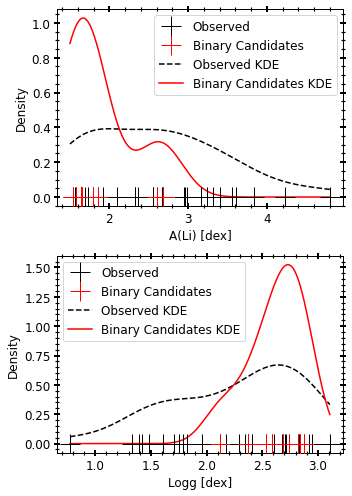

In [23]:
def make_kde():
    
    # Li KDE
    x1 = rv_df.Li_val.values
    x2 = both_galah.Li_val.values

    kde1 = gaussian_kde(x1)
    kde2 = gaussian_kde(x2)
    x_eval = np.linspace(1.5, max(x1), num=1000)

    
    # PLOTTING
    PLOT_PARAMS(LS=12,SIZE=12)
    plt.figure(figsize=(5,7))
    plt.subplot(211)

    plt.plot(x1, np.zeros(x1.shape), '+', color='k', ms=20, label='Observed',zorder=100)  # rug plot
    plt.plot(x2, np.zeros(x2.shape), '+', color='r', ms=20, label='Binary Candidates',zorder=100)  # rug plot
    plt.plot(x_eval, kde1(x_eval), color='k',label='Observed KDE', ls='dashed')
    plt.plot(x_eval, kde2(x_eval), color='r',label='Binary Candidates KDE')
    plt.xlabel('A(Li) [dex]')
    plt.ylabel('Density')
    plt.legend()
    
    # Logg KDE
    x1 = rv_df.logg.values
    x2 = both_galah.logg.values

    kde1 = gaussian_kde(x1)
    kde2 = gaussian_kde(x2)
    x_eval = np.linspace(min(x1), max(x1), num=1000)

    # PLOTTING
    plt.subplot(212)
    plt.plot(x1, np.zeros(x1.shape), '+', color='k', ms=20, label='Observed',zorder=100)  # rug plot
    plt.plot(x2, np.zeros(x2.shape), '+', color='r', ms=20, label='Binary Candidates',zorder=100)  # rug plot
    plt.plot(x_eval, kde1(x_eval), color='k',label='Observed KDE', ls='dashed')
    plt.plot(x_eval, kde2(x_eval), color='r',label='Binary Candidates KDE')
    plt.xlabel('Logg [dex]')
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
#     plt.savefig('../plots/binary_fraction_KDE_%s.png'%DATE,bbox_inches='tight',dpi=150)

make_kde()

In [24]:
def get_prob(n, r, p):
    '''Bernoulli trials
    n : trials
    r : success
    p : probability
    '''
    from math import comb
    
    q = 1.-p
    
    nchooser = comb(n, r)
    result = nchooser * p**r * q**(n-r)
    return result

bin1 = get_prob(n=11, r=7, p=9./33)
bin2 = get_prob(n=4, r=0, p=9./33)
bin3 = get_prob(n=9, r=2, p=9./33)


prob = 0
for i in range(0,7,1):
    r_0 = get_prob(n=33, r=i, p=9./33)
    #print(i, r_0)
    prob+=r_0

print('prob of getting r=0-6 out of 33 trials:',prob)
print('so prob of getting r>= 7 out of 33 trials:',1-prob)


# logg work:

logg_2to3    = get_prob(n=21, r=9, p=9./33)
logg_outside = get_prob(n=12, r=0, p=9./33) #outside of 2-3 range

prob = 0
for i in range(0,10,1):
    r_0 = get_prob(n=21, r=i, p=9./33)
    print(i, r_0)
    prob+=r_0

print('prob of getting r=0-8 out of 21 trials:',prob)
print('so prob of getting r>=9 out of 21 trials:',1-prob)



prob of getting r=0-6 out of 33 trials: 0.16441507197115557
so prob of getting r>= 7 out of 33 trials: 0.8355849280288444
0 0.0012463595292495733
1 0.009815081292840387
2 0.03680655484815145
3 0.08741556776435969
4 0.147513770602357
5 0.1880800575180051
6 0.1880800575180051
7 0.1511357605055398
8 0.09918284283176047
9 0.05372403986720359
prob of getting r=0-8 out of 21 trials: 0.9630000922774722
so prob of getting r>=9 out of 21 trials: 0.036999907722527814


0.2568636175066434 0.2568636175066434
[ 5.73 13.68]
[2.532172  2.5888839]
[0.55015676 3.46432112]
[4.21638521        nan]
[2.532172, 2.5888839]
[13.68, 5.73]
[ 0.03 -0.41]


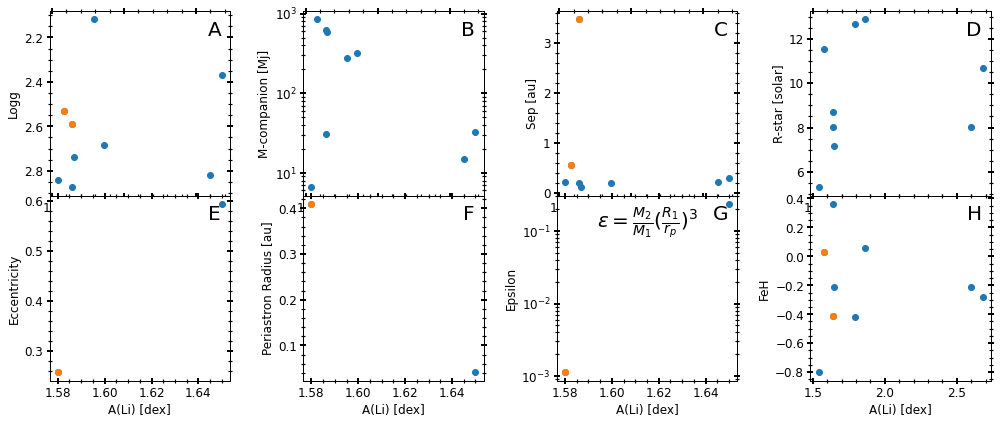

In [25]:

def peri_r(df):
    
    '''
    M1 : primary mass (ie. RG)
    M2 : companion mass
    R1 : primary radius (ie. RG)
    r  : periastron radius
    
    Dimensionless tidal amplitude parameter: 

    epsilon = (M_2/M_1)(R_1/r)^3

    Where R_1 is primary radius, 
    r is orbital separation (or distance at periastron), 
    M_2 is companion mass, M_1 is primary mass

    '''
    dfnew=df.copy()
    
    M1, M2 = df.m_act_bstep.to_numpy(), df.Mj50.to_numpy()
    a, e   = df.a50.to_numpy(), df.e50.to_numpy()
    R1     = df.radius_bstep.to_numpy()

    
    M1   = (M1*u.Msun).to(u.kg)
    M2   = (M2*u.Mjup).to(u.kg)
    a_au = (a*u.au)
    R1   = (R1*u.Rsun).to(u.au)
    r_p  = a_au*(1.-e)

    epsilon = (M2/M1)*(R1/r_p)**3.
    
    dfnew['epsilon'] = epsilon
    dfnew['rperi'] = r_p.value
    fig, ((ax1, ax2, ax3,ax4), (ax5,ax6,ax7, ax8)) = plt.subplots(2,4,figsize=(14,6))
    
    mask = (df.Mj50 <= 600) & (df.Mj50 >=83)
    mask = (df.Mj50 <= 80) & (df.Mj50 >=13)
    mask = (df.Mj50 <= 13)
    mask = (df.Mj50 >= 600)

    d2 = df[mask]
    print(min(d2.e50),max(d2.e50))
    print(np.sort(d2.vbroad))
    print(d2.logg.values)
    print(d2.a50.values)
    print(d2.P50.values)
    ax1.scatter(df.Li_val, df.logg)
    ax1.scatter(d2.Li_val, d2.logg)
    
    ax2.scatter(df.Li_val, df.Mj50)
    
    ax3.scatter(df.Li_val, df.a50)
    ax3.scatter(d2.Li_val, d2.a50)
    
    ax4.scatter(df.Li_val, df.radius_bstep)
    
    ax5.scatter(df.Li_val, df.e50)
    ax5.scatter(d2.Li_val, d2.e50)
    
    ax6.scatter(df.Li_val, df.a50*(1-df.e50))
    ax6.scatter(d2.Li_val, d2.a50*(1-d2.e50))
    
    ax7.scatter(df.Li_val, epsilon)#, c=df.logg)    
    ax7.scatter(d2.Li_val, epsilon[mask])
    #ax7.axvline(2.7)
    ax8.scatter(df.Li_val, df.fe_h)
    ax8.scatter(d2.Li_val, d2.fe_h)
    print(df.logg[mask].tolist())
    print(df.vbroad[mask].tolist())
    
    ax1.set_ylabel('Logg')
    ax2.set_ylabel('M-companion [Mj]')
    ax3.set_ylabel('Sep [au]')
    ax4.set_ylabel('R-star [solar]')
    ax5.set_ylabel('Eccentricity')
    ax6.set_ylabel('Periastron Radius [au]')
    ax7.set_ylabel('Epsilon')
    ax8.set_ylabel('FeH')
    
    ax1.invert_yaxis()
    ax2.set_yscale('log')
    ax7.set_yscale('log')
    
    for ax in [ax5,ax6,ax7,ax8]:
        ax.set_xlabel('A(Li) [dex]')
    
    formula = r'$\epsilon= \frac{M_2}{M_1} (\frac{R_1}{r_p} )^3$'
    
    ax7.text(0.5, 0.95, s=formula, transform=ax7.transAxes,fontsize=20, ha='center',va='top')
    
    for i,ax in zip('ABCDEFGH',[ax1,ax2,ax3,ax4,ax5,ax6,ax7, ax8]):
        ax.text(0.95, 0.95, s=i, transform=ax.transAxes,fontsize=20, ha='right',va='top')
        
    print(d2.fe_h.values)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0)
#     plt.savefig('../plots/diagnostic_%s.png'%DATE,bbox_inches='tight',dpi=200)
    #return dfnew[['RG_id','program','m_act_bstep','radius_bstep','rperi','a50','e50','Mj50','epsilon','Li_val','logg']].sort_values(by=['logg'])

peri_r(table4)


In [26]:
print('Eccentricity range:  %.3f-%.3f' % (min(table4.e50),max(table4.e50)))
print('Period range:  %.2f-%.2f' % (min(table4.P50),max(table4.P50)))
print('Separation range: %.2f-%.2f' % (min(table4.a50),max(table4.a50)))
print('Mstellar range:  %.2f-%.2f' % (min(table4.m_act_bstep),max(table4.m_act_bstep)))
print('FeH range:  %.2f-%.2f' % (min(table4.fe_h),max(table4.fe_h)))

table4[['fe_h','Mj50','m_act_bstep']].sort_values(by=['m_act_bstep'])


Eccentricity range:  nan-nan
Period range:  nan-nan
Separation range: nan-nan
Mstellar range:  0.96-1.99
FeH range:  -0.80-0.36


,fe_h,Mj50,m_act_bstep
0,-0.80,6.558069,0.956547
4,-0.28,32.753196,1.058158
2,-0.21,586.881701,1.243245
3,0.03,847.119749,1.611008
0,-0.42,276.347816,1.667217
5,-0.41,623.856409,1.728874
2,0.06,318.205869,1.796318
1,-0.21,14.790055,1.888812
1,0.36,30.495936,1.985078


In [27]:
table4.sort_values(by='Mj50')[['obj_name','program','RG_id','teff','Li_val','m_act_bstep','fe_h','logg','P50','e50','Mj50','vbroad']]#[table4.Mj50<100]

,obj_name,program,RG_id,teff,Li_val,m_act_bstep,fe_h,logg,P50,e50,Mj50,vbroad
0,ATO J337.2658-06.4234,113,9,4831.7334,1.54,0.956547,-0.80,2.840097,NaN,NaN,6.558069,12.10
1,UCAC4 314-010619,112,7,5152.4360,2.60,1.888812,-0.21,2.817549,NaN,NaN,14.790055,10.03
1,UCAC4 359-087248,113,11,4931.5230,1.64,1.985078,0.36,2.874994,NaN,NaN,30.495936,30.59
4,UCAC2 1639630,113,19,4552.9893,2.68,1.058158,-0.28,2.369927,NaN,NaN,32.753196,42.21
0,UCAC4 250-188426,112,6,4928.1020,1.79,1.667217,-0.42,2.119280,NaN,NaN,276.347816,7.95
2,CD-69 769,112,23,5045.6323,1.86,1.796318,0.06,2.683253,NaN,NaN,318.205869,13.34
2,TYC 8360-2322-1,113,16,4786.1600,1.65,1.243245,-0.21,2.736165,3.469231,0.593753,586.881701,50.70
5,UCAC4 224-182544,113,23,4952.6133,1.64,1.728874,-0.41,2.588884,NaN,NaN,623.856409,5.73
3,TYC 9264-1335-1,113,18,4786.7896,1.58,1.611008,0.03,2.532172,4.216385,0.256864,847.119749,13.68


In [84]:
# plt.scatter(table4.logg, table4.P50)
table4

,RG_id,Mj16,Mj50,Mj84,a16,a50,a84,P16,P50,P84,...,use_rv_flag,esp_time_y,esp_rv_y,esp_rv_err_y,m_act_bstep,e_m_act_bstep,radius_bstep,e_radius_bstep,v_max,v_orb
0,6,171.826027,276.347816,489.006687,NaN,NaN,NaN,NaN,NaN,NaN,...,0,[2460286.52633312 2460271.50561348 2460252.504...,[-2.97596293 -2.49940061 -1.67224661],[0.00886087 0.00525793 0.00573923],1.667217,0.532714,12.654351,0.909996,NaN,NaN
1,7,9.392502,14.790055,24.597146,0.213654,0.217037,0.220869,NaN,NaN,NaN,...,0,[2460299.52610808 2460272.60059796 2460327.520...,[3.11909891 3.08054002 2.88418409 3.56078024 3...,[0.02489859 0.01818485 0.01967496 0.035769 0...,1.888812,0.064000,8.013299,0.206622,NaN,NaN
2,23,214.619978,318.205869,554.687731,0.180384,0.190298,0.200998,NaN,NaN,NaN,...,0,[2460388.50479575 2460348.87299403 2460364.882...,[-1.86912108 3.32658486 -9.46735817],[0.00663089 0.00837487 0.01975791],1.796318,0.264294,12.867594,0.084008,NaN,NaN
0,9,5.670510,6.558069,7.439982,0.198483,0.205372,0.211722,NaN,NaN,NaN,...,0,[2460473.87834479 2460458.85018411 2460534.673...,[-44.4442598 -44.50548853 -44.12095429 -44.43...,[0.05024103 0.05054062 0.06273943 0.04256826 0...,0.956547,0.093214,5.307757,0.139619,NaN,NaN
1,11,17.571448,30.495936,58.329149,0.187975,0.190649,0.193114,NaN,NaN,NaN,...,0,[2460504.52312549 2460547.5883764 2460476.573...,[69.94735172 69.93045306 69.53730788 70.354179...,[0.06402008 0.06986536 0.10496806 0.08084854 0...,1.985078,0.050308,8.683977,0.137897,NaN,NaN
2,16,454.150858,586.881701,808.826610,0.097200,0.102468,0.107703,3.464524,3.469231,3.536320,...,0,[2460453.74225422 2460488.88720792 2460473.801...,[39.52938069 43.76718993 22.84001243 15.233563...,[0.10111777 0.11187892 0.08341896 0.08657685 0...,1.243245,0.177130,7.190328,0.126351,247.497431,321.325259
3,18,607.133845,847.119749,1123.759015,0.503783,0.550157,0.590345,4.212250,4.216385,5.178447,...,0,[2460515.54535378 2460435.70137357 2460499.701...,[-47.9155846 -37.1433239 -42.11636955 -14.19...,[0.0904714 0.02237316 0.02173481 0.02801057 0...,1.611008,0.413294,11.531145,0.141572,81.233873,1419.507555
4,19,29.815955,32.753196,36.032623,0.276405,0.287417,0.298067,NaN,NaN,NaN,...,0,[2460473.82536318 2460435.72400521 2460516.567...,[-34.03070487 -33.89898871 -32.97725796 -30.99...,[0.079425 0.07317809 0.08947075 0.07722614 0...,1.058158,0.118000,10.679730,0.167917,NaN,NaN
5,23,486.906528,623.856409,970.217173,3.262220,3.464321,3.672728,NaN,NaN,NaN,...,0,[2460506.58668542 2460455.81590345 2460473.857...,[16.29001445 14.58151513 14.97103738 17.341919...,[0.01512158 0.02215834 0.0117491 0.01486014 0...,1.728874,0.283500,8.011563,0.255235,NaN,NaN


0.9979878796723965 2.1219313118559793
132.41320935079239


0.03104716161308149
1.1328219010028278 2.011517744637128
102.68753874368966


0.021211528524255993
1.5695125890782013 2.068669920046223
117.13047919642328


0.017463085242317485
1.1069195798992253 2.5412816628765906
347.76163007951527


0.07351592917528402
1.6672169822739005 1.9076881106245451
80.85150540729549


0.011347804434851285
1.8888122436870771 1.5905839814318057
38.9568633018354


0.00482626372372231
1.252288769216257 1.7187023727547612
52.324172981997734


0.00977718300983428
1.7963179298128735 1.8841197006965205
76.58076505265308


0.009975906116011199
1.0675121405233818 2.1290222684262443
134.5929364742594


0.029502940471979457
1.076252423398292 2.1263624719843808
133.77115350177164


0.029084673110956954
0.954374194983881 2.597318706170756
395.65686558733495


0.097009859480746
1.170503710062704 2.590103187638594
389.1375924487609


0.07779402649491138
1.0271986214534212 3.22979999999984
1697.46176240809


0.38668

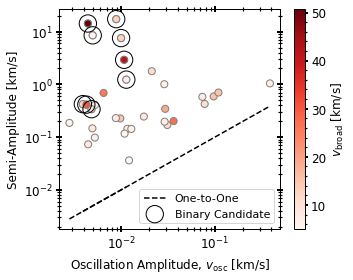

,vosc,vbroad
28,0.00649,25.94


In [47]:
def rv_variable(df, ax,binary=False):
    '''
    check how many out of 34 are RV variable: K>sigma_rv
    see adamow+2018 for details
    '''
    
    def calc_v_osc(L, M):
        '''
        Eq 7 in Kjeldsen & Bedding 1995
        @input: L & M in solar units
        
        @output: vosc in cm/s
        
        
        '''
        return (L/M) * 23.4 #cm/s
        
    def calc_lum(T, R):
        '''
        calculate luminosity
        @input: T in K, R in solar units
        '''
        return R**2.*(T/5777.)**4. 
        
    
    d1 = df.copy()
    all_vosc   = []
    all_K      = []
    all_rv_err = []
    for i,row in df.iterrows():
        dftemp = df[df.sobject_id==row.sobject_id]
        mass    = galah_vac[galah_vac.sobject_id==row.sobject_id].m_act_bstep.values[0]
        log_lum = galah_vac[galah_vac.sobject_id==row.sobject_id].log_lum_bstep.values[0]
        print(mass, log_lum)
        r_bstep = galah_vac[galah_vac.sobject_id==row.sobject_id].radius_bstep.values[0]
        lum     = 10.**log_lum
        print(lum)
        print('\n')
        _,rv_vals,rv_err,_,_ = clean_up(dftemp)
        K           = (np.max(rv_vals) - np.min(rv_vals))/2.
        v_osc       = (calc_v_osc(lum, mass)*u.cm/u.s).to(u.km/u.s).value
        print(v_osc)
        mean_rv_err = np.mean(rv_err)
        #print('%.3f \t %.2f \t %.3f' %( v_osc, K, mean_rv_err ))
        if row.sobject_id== 170416004301008:
            print(lum,mass,lum/mass*23.4,(lum/mass*23.4)/1e5)
        # save
        all_vosc.append(v_osc)
        all_K.append(K)
        all_rv_err.append(mean_rv_err)
        
    d1['vosc'] = all_vosc
    d1['K_rv'] = all_K
    d1['mean_rv_err'] = all_rv_err
    
        #print(K,mean_rv_err)
    
    #ax1.scatter(d1.K_rv,d1.mean_rv_err)
#     np.log10(d1.K_rv*1000/d1.vosc)
    im=ax.scatter(d1.vosc,d1.K_rv,c=d1.vbroad,cmap='Reds',ec='grey',s=50)
    if binary:
        ax.scatter(d1.vosc,d1.K_rv,fc='None',ec='k',s=300,label='Binary Candidate')
    ax.legend(loc='lower right',fontsize=11)
    line = np.linspace(min(d1.vosc),max(d1.vosc),1000)
    ax.plot(line, line, c='k', ls='dashed',label='One-to-One')
    
    print(np.sort(np.log10(d1.K_rv*1000/d1.vosc)))
    return im, d1
    
plt.figure(figsize=(5,4))
ax=plt.subplot(111) 
ax.set_ylabel('Semi-Amplitude [km/s]')

ax.set_xlabel(r'Oscillation Amplitude, $v_{\rm osc}$ [km/s]')
ax.set_xscale('log') 
ax.set_yscale('log') 
im,d1=rv_variable(rv_df,ax)

plt.colorbar(im,label=r'$v_{\rm broad}$ [km/s]')
_=rv_variable(table4,ax,binary=True)
plt.tight_layout()
# plt.savefig('../plots/vosc_%s.png'%DATE,bbox_inches='tight',dpi=150)
plt.show()
# d1[['vosc','K_rv','sobject_id','program','RG_id']].sort_values(by=['vosc'])
d1[(d1.program==113) & (d1.RG_id==21) ][['vosc','vbroad']]

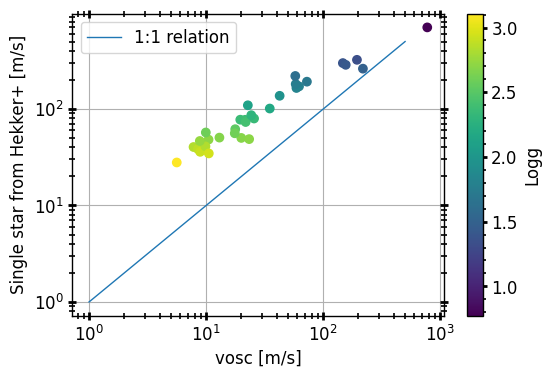

In [66]:
def compare_vosc_jitter(d):
    
    x = np.linspace(0,4,100)    

    def func1(logg):
        a, b = -0.60, 3.31
        log_v = a*logg+b
        return 10.**log_v
    
    def func2(logg):
        siga, sigb = 0.04, 0.10
        a, b = -0.60, 3.31
        a = a+3.5*siga
        b = b+3.5*sigb
        log_v = (a*logg+b)
        return 10.**log_v
    
    def func3(logg):
        siga, sigb = -0.04, -0.10
        a, b = -0.60, 3.31
        a = a+3.5*siga
        b = b+3.5*sigb
        log_v = (a*logg+b)
        return 10.**log_v
    
    line = np.linspace(1,500, 1000)
    plt.figure(dpi=100)
    plt.plot(line,line,lw=1,label='1:1 relation')
    plt.legend()
    vosc_km_s = list(d1.vosc)*u.km/u.s
    vosc_cm_s = vosc_km_s.to(u.cm/u.s)
    vosc_m_s  = vosc_km_s.to(u.m/u.s)
    
    plt.scatter(vosc_m_s.value*2, func1(d1.logg), c=d1.logg)
    plt.colorbar(label='Logg')
#     plt.plot(line,2*line,lw=1)
#     plt.plot(line,3*line,lw=1)
#     plt.plot(line,4*line,lw=1)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Single star from Hekker+ [m/s]')
    plt.xlabel('vosc [m/s]')
    plt.grid()
    
compare_vosc_jitter(d1)

In [29]:
d1

,sobject_id,logg,teff,RG_id,galah_id,obj_name,esp_time_x,esp_rv_x,esp_rv_err_x,Li_val,...,rv_galah,e_rv_galah,dr2_radial_velocity,use_rv_flag,esp_time_y,esp_rv_y,esp_rv_err_y,vosc,K_rv,mean_rv_err
0,150107004201104,1.792561,4190.2886,1,150107004201104,UCAC4 297-057956,"[2460341.53519178, 2460389.56581584, 2460371.5...","[53.7010931002614, 53.7985038354756, 53.715772...","[0.0356353249891873, 0.0194215970708735, 0.018...",3.41,...,53.551998,0.072000,53.454258,0,[2460341.53519178 2460389.56581584 2460371.513...,[53.7010931 53.79850384 53.71577284 53.45877222],[0.03563532 0.0194216 0.01884311 0.00615718],0.031047,0.169866,0.030411
1,151230003202196,1.955321,4321.9950,2,151230003202196,UCAC4 159-007674,"[2460371.51618373, 2460396.54486059, 2460327.5...","[32.3479397396596, 32.2219401343109, 32.128779...","[0.0162974981805524, 0.0156970104026681, 0.005...",2.10,...,29.725057,0.429335,29.250263,1,[2460371.51618373 2460396.54486059 2460327.535...,[32.34793974 32.22194013 32.12877981 32.434652...,[0.0162975 0.01569701 0.0056299 0.0238087 0...,0.021212,1.779323,0.075528
2,161013005401317,2.175321,4737.9043,4,161013005401317,TYC 763-2824-1,"[2460385.50719579, 2460339.55203199, 2460323.5...","[50.1334256209368, 49.643055167163, 49.6464491...","[0.00602351904165543, 0.00207762671021825, 0.0...",2.68,...,49.868000,0.067000,NaN,0,[2460385.50719579 2460339.55203199 2460323.549...,[50.13342562 49.64305517 49.64644919 49.69425162],[0.00602352 0.00207763 0.00137321 0.00115142],0.017463,0.245185,0.015525
3,161104004801189,1.390041,4299.7603,5,161104004801189,UCAC4 374-013344,"[2460346.5207515, 2460299.53971361, 2460373.50...","[100.525659487395, 99.3956402889891, 100.55635...","[0.0229883375694359, 0.0145615842657439, 0.017...",2.96,...,99.723000,0.067000,NaN,0,[2460346.5207515 2460299.53971361 2460373.509...,[100.52565949 99.39564029 100.55635396 99.78...,[0.02298834 0.01456158 0.01773539 0.00951123 0...,0.073516,0.580357,0.025447
4,150829004301285,2.119280,4928.1020,6,150829004301285,UCAC4 250-188426,"[2460286.52633312, 2460271.50561348, 2460252.5...","[-2.97596292534722, -2.49940060699565, -1.6722...","[0.00886086887660445, 0.00525792633892974, 0.0...",1.79,...,-4.131000,0.066000,0.823350,0,[2460286.52633312 2460271.50561348 2460252.504...,[-2.97596293 -2.49940061 -1.67224661],[0.00886087 0.00525793 0.00573923],0.011348,1.229377,0.021465
5,160129003601260,2.817549,5152.4360,7,160129003601260,UCAC4 314-010619,"[2460299.52610808, 2460272.60059796, 2460327.5...","[3.11909891220514, 3.08054001727914, 2.8841840...","[0.0248985920427361, 0.0181848465814946, 0.019...",2.60,...,3.119000,0.113000,NaN,0,[2460299.52610808 2460272.60059796 2460327.520...,[3.11909891 3.08054002 2.88418409 3.56078024 3...,[0.02489859 0.01818485 0.01967496 0.035769 0...,0.004826,0.338298,0.040315
6,140311007101261,2.368252,4635.8790,14,140311007101261,UCAC4 220-051792,"[2460388.49997333, 2460303.83889431, 2460344.8...","[23.5296422600186, 23.3061153528581, 23.235479...","[0.0497316920164264, 0.0188699131292371, 0.051...",3.24,...,23.688000,0.082000,23.933779,0,[2460388.49997333 2460303.83889431 2460344.874...,[23.52964226 23.30611535 23.23547938],[0.04973169 0.01886991 0.05167865],0.009777,0.226260,0.050570
7,170514002101318,2.683253,5045.6323,23,170514002101318,CD-69 769,"[2460388.50479575, 2460348.87299403, 2460364.8...","[-1.86912108153358, 3.32658485817988, -9.46735...","[0.00663088631076367, 0.00837486742297982, 0.0...",1.86,...,5.624000,0.069000,4.061438,0,[2460388.50479575 2460348.87299403 2460364.882...,[-1.86912108 3.32658486 -9.46735817],[0.00663089 0.00837487 0.01975791],0.009976,7.545679,0.025941
8,140806001701013,1.820287,4199.8174,1,140806001701013,UCAC4 139-176959,"[2460533.54547529, 2460499.69626092, 2460455.8...","[25.0457252755331, 25.0568689052661, 24.457863...","[0.0643989386695004, 0.0637748847898338, 0.069...",3.32,...,25.080000,0.112000,23.832865,0,[2460533.54547529 2460499.69626092 2460455.859...,[25.04572528 25.05686891 24.45786337 25.040922...,[0.0

In [ ]:
ss

In [ ]:
# table4[(table4.program==113) & (table4.RG_id==21)][['P50','e50','K50']]

In [ ]:
def compare_adamow(df):
    '''
    compare our orbital parameters to Adamow 2014: 
    https://www.aanda.org/articles/aa/pdf/2018/05/aa32161-17.pdf
    '''
    
    d = {
        'TYC 0405-01700-1'  : {'M': 0.53*u.Msun.to(u.Mjup) , 'a': 0.220, 'e': 0.04},
        'TYC 3314-01371-1'  : {'M': 0.235*u.Msun.to(u.Mjup), 'a': 2.17, 'e': 0.3392 },
        'HD 181368'         : {'M': 220, 'a': 10.7 , 'e': 0.75},
        'BD+48 740'         : {'M': 1.7, 'a': 1.7  , 'e': 0.76},
        'HD 238914'         : {'M': 6,   'a': 5.7  , 'e': 0.56 },
        'TYC 3318-01333-1'  : {'M': 3.4, 'a': 1.4  , 'e': 0.1},
        'TYC 3663-01966-1'  : {'M': 1.3, 'a': 0.7  , 'e': 0.5} ,#maybe
        'TYC 3105-00152-1'  : {'M': 4.6, 'a': 1.92 , 'e': 0.78} #maybe   
    }
    
    ec1, fc1 = 'k', 'lightgrey'
    ec2, fc2 = 'k', '#FB6A4A'

    plt.figure(figsize=(5,8))
    PLOT_PARAMS(LS=14, SIZE=14)
    ax1=plt.subplot(211)
    plt.scatter(df.a50, df.e50, ec=ec1,fc=fc1)
    for k, v in d.items():
        if k in ['TYC 3663-01966-1','TYC 3105-00152-1' ]:
            plt.scatter(v['a'], v['e'],ec=ec2,fc=fc2,marker='s')
        else:
            plt.scatter(v['a'], v['e'],ec=ec2,fc=fc2,marker='o')

    ax2=plt.subplot(212)
    plt.scatter(df.a50, df.Mj50, ec=ec1,fc=fc1)
    for k, v in d.items():
        if k in ['TYC 3663-01966-1','TYC 3105-00152-1' ]:
            plt.scatter(v['a'], v['M'],ec=ec2,fc=fc2,marker='s')
        else:
            plt.scatter(v['a'], v['M'],ec=ec2,fc=fc2,marker='o')
    plt.yscale('log')
    ax2.set_xlabel('Separation [au]')
    ax2.set_ylabel('M$\sin i$, $M_J$')
    ax1.set_ylabel('Eccentricity')

    
    lgnd1 = [Line2D([0], [0], marker='o', label='This Work', mfc=fc1, mec=ec1, color='white',  lw=1), 
             Line2D([0], [0], marker='o', label='Adamòw+2018', mfc=fc2, mec=ec2, color='white',  lw=1), 
             Line2D([0], [0], marker='s', label='Possible Companions\nin Adamòw+2018', mfc=fc2, mec=ec2, color='white',  lw=1)]
    
    ax1.legend(handles=lgnd1,loc='lower right',fontsize=12)
    plt.savefig('../plots/adamow_%s.png'%DATE,bbox_inches='tight',dpi=200)
compare_adamow(table4)
    

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(table4.e50,table4.fe_h, )
plt.xlabel('Eccentricity')
plt.ylabel('FeH')
plt.axhline(-0.1, c='k',ls='dashed',lw=1)
plt.axhline(-0.4, c='k',ls='dashed',lw=1)
plt.axhline(0, c='k',ls='dashed',lw=1)
plt.axhline(0.7, c='k',ls='dashed',lw=1)
plt.tight_layout()
# plt.savefig('../plots/ecc_vs_feh_%s.png'%DATE,bbox_inches='tight',dpi=200)

In [ ]:
PLOT_PARAMS(LS=12,SIZE=12)
fig, ((ax1),(ax2)) = plt.subplots(2,1,figsize=(4,6))


ax1.scatter(rv_df.vbroad, rv_df.Li_val,ec='k',fc='grey',marker='s',label='ESPRESSO Targets',s=25)
mask_112 = (rv_df.RG_id.isin(binary_list_112) & (rv_df.program==112))
mask_113 = (rv_df.RG_id.isin(binary_list_113) & (rv_df.program==113))
ax1.scatter(rv_df[mask_112].vbroad, rv_df[mask_112].Li_val,ec='r',s=150,fc='None')
ax1.scatter(rv_df[mask_113].vbroad, rv_df[mask_113].Li_val,ec='r',s=150,fc='None',label='Binary Candidate')

ax1.set_xlabel('$\mathrm{v_{broad}}$ [km/s]')
ax1.set_ylabel('A(Li) [dex]')

ax2.scatter(rv_df.teff, rv_df.logg,ec='k',fc='grey',marker='s',label='ESPRESSO Targets',s=25)
ax2.scatter(rv_df[mask_112].teff, rv_df[mask_112].logg,ec='r',s=150,fc='None')
ax2.scatter(rv_df[mask_113].teff, rv_df[mask_113].logg,ec='r',s=150,fc='None',label='Binary Candidate')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
ax2.set_xlabel('Teff [K]')
ax2.set_ylabel('Logg [dex]')

ax1.grid(ls='dotted',c='grey')
ax2.grid(ls='dotted',c='grey')

lgnd=ax1.legend(fontsize=10)
lgnd.legend_handles[0]._sizes = [30]
lgnd.legend_handles[1]._sizes = [30]


def make_density_plot(x,y,nbins=100):
    from scipy.stats import gaussian_kde

    # Calculate the point density
    k = gaussian_kde([x,y])
    xi, yi = np.mgrid[
       x.min():x.max():nbins*1j,
       y.min():y.max():nbins*1j
    ]
    zi = k(np.vstack([xi.flatten(),yi.flatten()])).reshape(xi.shape)
    return xi,yi,zi

xi,yi,zi=make_density_plot(df_rich.vbroad, df_rich.fe_h+df_rich.Li_fe+1.05)
ax1.pcolormesh(xi, yi, zi,cmap='Reds',zorder=0)

xi,yi,zi=make_density_plot(df_rich.teff, df_rich.logg,)
ax2.pcolormesh(xi, yi, zi,cmap='Reds',zorder=0)

fig.tight_layout()
plt.savefig('../plots/hrd_%s.png'%DATE,bbox_inches='tight',dpi=200)

In [ ]:
PLOT_PARAMS(SIZE=12)
fig, ax1 = plt.subplots(1,1,figsize=(5,4.5))

ax1.scatter(rv_df.vbroad, rv_df.Li_val,ec='k',fc='grey',label='ESPRESSO Targets')
mask_112 = (rv_df.RG_id.isin(binary_list_112) & (rv_df.program==112))
mask_113 = (rv_df.RG_id.isin(binary_list_113) & (rv_df.program==113))
# ax1.scatter(rv_df[mask_112].vbroad, rv_df[mask_112].Li_val,ec='r',s=200,fc='None')
# ax1.scatter(rv_df[mask_113].vbroad, rv_df[mask_113].Li_val,ec='r',s=200,fc='None',label='Binary Candidate')

ax1.set_xlabel('$\mathrm{v_{broad}}$ [km/s]')
ax1.set_ylabel('A(Li) [dex]')
ax1.set_xscale('log')

# colorbar
bounds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.2]
cmap_color = 'Reds_r'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'Logg [dex]'

im = ax1.scatter(rv_df.vbroad, rv_df.Li_val, c=rv_df.logg, norm=norm, cmap=cmap,s=50, ec='k')

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb1 = fig.colorbar(im, cax=cax1, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax1.xaxis.set_ticks_position("top") # change tick position to top
cb1.ax.set_title(clabel)

# fig.colorbar(im,label='Logg [dex]')

ax1.grid(ls='dotted',c='grey')
ax1.set_ylim(1.5, 5.0)
# ax2.grid(ls='dotted',c='grey')

lgnd=ax1.legend()
lgnd.legend_handles[0]._sizes = [50]
# lgnd.legend_handles[1]._sizes = [30]

def make_density_plot(x,y,nbins=100):
    from scipy.stats import gaussian_kde

    # Calculate the point density
    k = gaussian_kde([x,y])
    xi, yi = np.mgrid[
       x.min():x.max():nbins*1j,
       y.min():y.max():nbins*1j
    ]
    zi = k(np.vstack([xi.flatten(),yi.flatten()])).reshape(xi.shape)
    return xi,yi,zi

xi,yi,zi=make_density_plot(df_rich.vbroad, df_rich.fe_h+df_rich.Li_fe+1.05)
ax1.pcolormesh(xi, yi, zi,cmap='gist_yarg',zorder=0)

xticks = [4, 8, 10, 20, 40, 60]
xlabels = ['%i' %x for x in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)

# xi,yi,zi=make_density_plot(df_rich.teff, df_rich.logg,)
# ax2.pcolormesh(xi, yi, zi,cmap='Reds',zorder=0)

fig.tight_layout()

# plt.savefig('../plots/hrd_2_%s.png'%DATE,bbox_inches='tight',dpi=200)

In [ ]:
print('\n')
print('# with logg < 2.5:',rv_df[rv_df.logg <= 2.5].sobject_id.count())
print('# with logg < 2.5 in 112:',rv_df[mask_112][rv_df[mask_112].logg <= 2.5].sobject_id.count())
print('# with logg < 2.5 in 113:',rv_df[mask_113][rv_df[mask_113].logg <= 2.5].sobject_id.count())
print('total:',7)

print('\n')
print('# with logg = 2.5-3.0:',rv_df[(rv_df.logg >= 2.5) & (rv_df.logg <= 3.0)].sobject_id.count())
print('# with logg = 2.5-3.0 in 112:',rv_df[mask_112][(rv_df[mask_112].logg >= 2.5) & (rv_df[mask_112].logg <= 3.0)].sobject_id.count())
print('# with logg = 2.5-3.0 in 113:',rv_df[mask_113][(rv_df[mask_113].logg >= 2.5) & (rv_df[mask_113].logg <= 3.0)].sobject_id.count())
print('total:',8)

print('\n')
print('# with logg > 3.0:',rv_df[rv_df.logg >= 3.0].sobject_id.count())

In [ ]:
table3 = table4.copy() #table4[~((table4.RG_id==23) & (table4.program==112))]


In [ ]:
def half_amp_plot(df):
    
    new_d = {'RG_id':[],'program':[], 'logg':[],'half_rv':[]}
    for i, row in df.iterrows():
        program, RG_id = row.program,row.RG_id
        dtemp = df[(df.program==program) & (df.RG_id==RG_id)]
        _,rv_vals,_,_,_ = clean_up(dtemp)
        half_rv  = (max(rv_vals)-min(rv_vals))/2.
        new_d['logg'].append(dtemp.logg.values[0])
        new_d['half_rv'].append(half_rv)
        new_d['program'].append(program)
        new_d['RG_id'].append(RG_id)
    new_d = pd.DataFrame(new_d)
    
    new_d1 = pd.merge(table3[table3.program==112], new_d[new_d.program==112],on='RG_id')
    new_d2 = pd.merge(table3[table3.program==113], new_d[new_d.program==113],on='RG_id')
    new_d1 = pd.concat([new_d1, new_d2])
    
    plt.figure(figsize=(5,4))
    ax=plt.subplot(111)
    
    bounds = [0,1,2,3,4]
    cmap_color = 'Reds'
    cmap = plt.get_cmap(cmap_color, len(bounds))
    norm = colors.BoundaryNorm(bounds, cmap.N)
    clabel = 'Separation [AU]'

    mask_112 = (new_d.RG_id.isin(binary_list_112) & (new_d.program==112))
    mask_113 = (new_d.RG_id.isin(binary_list_113) & (new_d.program==113))

    plt.scatter(new_d.logg, new_d.half_rv*1000,ec='None',fc='k',s=60)
    im=plt.scatter(new_d1.logg_x, new_d1.half_rv*1000,c=new_d1.a50,cmap=cmap, norm=norm,ec='grey',s=60)
    #plt.scatter(new_d[mask_112].logg, new_d[mask_112].half_rv*1000,ec='r',s=150,fc='None')
    #plt.scatter(new_d[mask_113].logg, new_d[mask_113].half_rv*1000,ec='r',s=150,fc='None',label='Binary Candidate')
    
    plt.yscale('log')
    plt.xlabel('Logg [dex]')
    plt.ylabel('Half Peak-to-Peak [m/s]')
    plt.xlim(0.5,3.5)
    
    plt.ylim(10,3e4)
    
    x = np.linspace(0,4,100)    

    def func1(logg):
        a, b = -0.60, 3.31
        log_v = a*logg+b
        return 10.**log_v
    
    def func2(logg):
        siga, sigb = 0.04, 0.10
        a, b = -0.60, 3.31
        a = a+3.5*siga
        b = b+3.5*sigb
        log_v = (a*logg+b)
        return 10.**log_v
    
    def func3(logg):
        siga, sigb = -0.04, -0.10
        a, b = -0.60, 3.31
        a = a+3.5*siga
        b = b+3.5*sigb
        log_v = (a*logg+b)
        return 10.**log_v
    
    
    y1 = func1(x)
    y2 = func2(x)
    y3 = func3(x)
    
    plt.plot(x,y1, c='k',ls='solid',lw=1)
    plt.plot(x,y2, c='grey',ls='dashed',label=r'$3.5\sigma$',lw=1)
    plt.plot(x,y3, c='grey',ls='dashed',lw=1)

    
    plt.legend(loc='lower left')
    
    plt.grid(ls='dotted',lw=1,c='grey')
    
    

    ax2_divider = make_axes_locatable(ax)
    cax2 = ax2_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
    cb2 = fig.colorbar(im, cax=cax2, orientation="horizontal", boundaries=bounds, ticks=bounds)
    cax2.xaxis.set_ticks_position("top") # change tick position to top
    cb2.ax.set_title(clabel)

    #plt.savefig('../plots/peak_to_peak_%s.png'%DATE,bbox_inches='tight',dpi=200)

half_amp_plot(rv_df)


In [ ]:
ss

In [ ]:
mearth = (u.Mjup).to(u.Mearth)
msolar = (u.Msun).to(u.Mjup)

PLOT_PARAMS(LS=12, SIZE=12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharex=True, sharey=True)

# ax1=plt.subplot(132,sharex=ax1,sharey=ax1)
bounds = [5,8,15,30,51]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'v$_{\mathrm{broad}}$ [km/s]'

im1=ax1.scatter(table3.Mj50, table3.Li_val,c=table3.vbroad,cmap=cmap,norm=norm,ec='k',s=60)
ax1.set_xscale('log')
ax1.set_ylabel('A(Li) [dex]')

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax1.xaxis.set_ticks_position("top") # change tick position to top
cb1.ax.set_title(clabel)

bounds = [-0.8, -0.5, -0.1,0.1, 0.4]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = '[Fe/H]'

im2=ax2.scatter(table3.Mj50, table3.Li_val,c=table3.fe_h,cmap=cmap,norm=norm,ec='k',s=60)
ax2.set_xscale('log')

ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax2.xaxis.set_ticks_position("top") # change tick position to top
cb2.ax.set_title(clabel)

bounds = [0., 1.0, 2.0, 3.0, 3.2]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'Logg [dex]'

im3=ax3.scatter(table3.Mj50, table3.Li_val,c=table3.logg,cmap=cmap,norm=norm,ec='k',s=60)
ax3.set_xscale('log')

ax3_divider = make_axes_locatable(ax3)
cax3 = ax3_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb3 = fig.colorbar(im3, cax=cax3, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax3.xaxis.set_ticks_position("top") # change tick position to top
cb3.ax.set_title(clabel)
max(table3.logg)

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(r'M$ \sin i$ [M$_{Jup}$]')
    ax.errorbar(table3.Mj50, table3.Li_val, 
                xerr=[table3.Mj50-table3.Mj16,table3.Mj84-table3.Mj50],
                yerr=table3.e_Li_val, fmt='o', 
                color='k',lw=1, capsize=2, mec='None',mfc='None',zorder=-100)
    
    
    # M-dwarf limit
    ax.axvspan(0.08*msolar, 0.6*msolar, color=cmap(0.5), alpha=0.2, label='M-Dwarf',zorder=-100)
    #ax.text(0.65, 0.95, 'M-Dwarf\nRegion',fontsize=10, ha='center',va='top',transform=ax.transAxes)

    
    # 0.6 Msun (white dwarf peak)
    #ax.axvline(0.6*msolar,c='k',ls='dotted',zorder=-1)
    #ax.text(0.6*msolar, 4.8, '$\mathrm{0.6 \; M_\odot}$',ha='center',fontsize=10, c='k', va='top')
    ax.axvspan(0.4*msolar, 1100, fc='none',hatch='//',ec='grey',zorder=-1000)

    
    # Brown Dwarf :
    ax.axvspan(13, 80, color='tab:brown', alpha=0.2, label='Brown Dwarf',zorder=-100)
    #ax.text(0.33, 0.05, 'Brown Dwarf\nRegion',fontsize=10, ha='center',va='bottom',transform=ax.transAxes)
    
    # Dashed line for Li=2.7
    #ax.axhline(2.7,c='k',ls='dashed',zorder=-1,lw=1)
    ax.tick_params(axis='x', labelbottom=True)

ax1.set_ylim(1.4, 3.0)
ax1.set_xlim(5, 1350)

lgnd = [Patch(color='tab:brown', alpha=0.2, label='Brown Dwarf'), 
        Patch(color=cmap(0.5), alpha=0.2, label='M-Dwarf'), 
        Patch(fc='none',ec='grey', hatch='//', label='White-Dwarf'), 
        #Line2D([0], [0], color='k', lw=1, label='A(Li)=2.7 dex',ls='dashed'),
       ]

ax1.legend(handles=lgnd, loc='upper right', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

plt.savefig('../plots/msini_vs_ali_mix_%s.png'%DATE,bbox_inches='tight',dpi=200)
print(table3.vbroad.min(),table3.vbroad.max())
print(table3.fe_h.min(),table3.fe_h.max())
print(table3.Li_val.min(),table3.Li_val.max())
print(table3.logg.min(),table3.logg.max())



In [ ]:
def plot_joker_samples(df, obj, program, ax, N, version=1):

    dftemp  = df[(df.RG_id==obj) & (df.program==program)]
    time, rv, rv_err, source, dft = clean_up(dftemp)
    
    idx = np.argsort(time)
    time, rv, rv_err, source = time[idx], rv[idx], rv_err[idx], source[idx]
    
    rv_err                = np.array(rv_err)
    rv_err[(rv_err<0.10)] = 0.10
    
    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    print(len(joker_samples),obj, program)
    data = Table()
    data['bjd']     = time
    data['rv']      = rv
    data['rv_err']  = rv_err
    data["rv"].unit = u.km / u.s
    data["rv_err"].unit = u.km / u.s
    
    def convert_mjd_to_jd(mjd):
        t = Time(mjd, format='mjd', scale='local')
        return t.mjd
    
    t = Time(data["bjd"], format="jd", scale="tcb")
    
    new_data = tj.RVData(
        t=t,
        rv=u.Quantity(data["rv"]),
        rv_err=u.Quantity(data["rv_err"]))
    
    
    _ = tj.plot_rv_curves(joker_samples[:N], data=new_data,ax=ax, add_labels=True)
    
    unique_sources = dft.source.unique()
    color_d = {'ESPRESSO': 'darkred', 'GALAH':'C1', 'RAVE':'C0', 'APOGEE': 'gold'}
    
    for source in unique_sources:
        d = dft[dft.source==source]
        time, rv, rv_err = d.time, d.rv, d.rv_err
        time = Time(time, format="jd", scale="tcb")
        ax.errorbar(time.mjd, rv, fmt='o', yerr=rv_err, label=source, mec='white', color=color_d[source],capsize=2, zorder=100)
    
    label = '%s-%s'%(program,obj)

    leg_pos = {'112-6':'lower left',
               '112-7':'lower left',
               '112-23':'lower left',
               '113-6':'lower left',
               '113-9':'upper left',
               '113-11':'lower left',
               '113-16':'lower left',
               '113-18':'lower left',
               '113-19':'upper left',
               '113-23':'lower left',
          } 
    ax.legend(loc=leg_pos[label],fontsize=12)
    
    title = 'P%s - RG %s'%(program, obj)
    ax.set_title(title,fontsize=10)

    #left, bottom, width, height
    pos = {'112-6': [0.25,0.55,0.5,0.4], #middle top
           '112-7': [0.25,0.55,0.5,0.4], 
           '112-23':[0.25,0.55,0.5,0.4],
           '113-6': [0.48,0.12,0.5,0.4], #bottom right
           '113-9': [0.48,0.55,0.5,0.4], #top right
           '113-11':[0.25,0.55,0.5,0.4], 
           '113-16':[0.25,0.55,0.5,0.4], 
           '113-18':[0.25,0.55,0.5,0.4], 
           '113-19':[0.25,0.12,0.5,0.4], #middle bottom
           '113-23':[0.25,0.55,0.5,0.4], 
          } 
    ins = ax.inset_axes(pos[label]) 

    source = 'ESPRESSO'
    d = dft[dft.source==source]
    time, rv, rv_err = d.time, d.rv, d.rv_err
    time = Time(time, format="jd", scale="tcb")
    ins.errorbar(time.mjd, rv, fmt='o', yerr=rv_err, label=source, mec='white', color=color_d[source],capsize=2, zorder=100)
    new_xlim = ins.get_xlim()
    new_ylim = ins.get_ylim()
    
    tj.plot_rv_curves(joker_samples[:N], data=new_data,ax=ins)
    ins.set_xlim(new_xlim)
    ins.set_ylim(new_ylim)
    ins.set_xlabel('')
    ins.set_ylabel('')

PLOT_PARAMS(LS=10, SIZE=10)
plt.figure(figsize=(6,3))
ax=plt.subplot(111)
plot_joker_samples(rv_df, 23, 113, N=100, ax=ax,version=1)
# plt.savefig('../plots/joker_samples_113-23_%s.png'%DATE,bbox_inches='tight',dpi=200)


In [ ]:

PLOT_PARAMS(LS=10, SIZE=10)
fig, axes = plt.subplots(5, 2, figsize=(10, 14),dpi=200)

for i, ax in enumerate(fig.axes):
    if i==9:
        ax.set_axis_off()
        continue
    if i < len(binary_list_112):
        obj = binary_list_112[i]
        plot_joker_samples(rv_df, obj, program=112, ax=ax, N=100)
    elif i >= len(binary_list_112):
        obj = binary_list_113[i-len(binary_list_112)]
        plot_joker_samples(rv_df, obj, program=113, ax=ax, N=100)
    if i<6:
        ax.xaxis.label.set_visible(False)

        #ax.tick_params(axis='both', bottom=False, labelbottom=False)
    if i % 2 != 0:
        ax.yaxis.label.set_visible(False)
        #ax.tick_params(axis='both', left=False, labelleft=False)
    


plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
# plt.close()
plt.savefig('../plots/all_joker_samples_%s.png'%DATE,bbox_inches='tight',dpi=200)



In [ ]:
ss

In [ ]:
def wd_eq1(mf):
    'from cummings 2018'
    return (mf-0.489)/0.080
def wd_eq2(mf):
    'from cummings 2018'
    return (mf-0.184)/0.187
def wd_eq3(mf):
    'from cummings 2018'
    return (mf-0.471)/0.107

print(wd_eq1(0.6),wd_eq2(0.6),wd_eq3(0.6))
print(wd_eq1(0.8),wd_eq2(0.8),wd_eq3(0.8))

In [ ]:
_, a1, _, _, _ = clean_up(rv_df[(rv_df.RG_id==19) & (rv_df.program==113)])
(np.max(a1)-np.min(a1))/2

In [ ]:
def earth_moon_epsilon():
    M2 = 7.3e22     #kg
    M1 = 6.0e24     #kg
    a  = 384_400
    e  = 0.0549     #km 
    rp = a*(1.-e)
    R1 = 6357       #km
    epsilon = (M2/M1)*(R1/rp)**3.
    return epsilon

earth_moon_epsilon()


In [ ]:
def calculate_epsilon(M1, M2, R1, a, e):
    """
    M1 & M2 in same units
    R1 and a in same units
    """
    
    
    rp = a*(1.-e)
    return (M2/M1)*(R1/rp)**3.
wasp_12 = calculate_epsilon(M1 = 1.4*u.Msun.to(u.kg), 
                            M2 = 1.5*u.Mjup.to(u.kg),
                            R1 = 1.8*u.Rsun,
                            a  = 3.006*(1.8*u.Rsun), #a/Rstar = 3.006
                            e  = 0.0
                           )
koi_4   = calculate_epsilon(M1 = 1.45*u.Msun.to(u.kg), 
                            M2 = 5.88*u.Mjup.to(u.kg),
                            R1 = 2.89*u.Rsun,
                            a  = 4.07*(3.89*u.Rsun), #a/Rstar = 3.006
                            e  = 0.0585
                           )


p113_16 = calculate_epsilon(M1 = 1.24*u.Msun.to(u.kg), 
                            M2 = 589.7*u.Mjup.to(u.kg),
                            R1 = 7.19*u.Rsun.to(u.m),
                            a  = 0.10*u.au.to(u.m),
                            e  = 0.59
                           )

p113_18 = calculate_epsilon(M1 = 1.61*u.Msun.to(u.kg), 
                            M2 = 840.978*u.Mjup.to(u.kg),
                            R1 = 11.5*u.Rsun.to(u.m),
                            a  = 0.55*u.au.to(u.m),
                            e  = 0.256
                           )

print(p113_16)
print(p113_18)

In [ ]:
def uni_modal():
    df = table4[(table4.program==113) & ((table4.RG_id==16) | (table4.RG_id==18))]
    
    M1, M2 = df.m_act_bstep.to_numpy(), df.Mj50.to_numpy()
    a, e   = df.a50.to_numpy(), df.e50.to_numpy()
    R1     = df.radius_bstep.to_numpy()
    
    M1   = (M1*u.Msun).to(u.kg)
    M2   = (M2*u.Mjup).to(u.kg)
    a_au = (a*u.au)
    R1   = (R1*u.Rsun).to(u.au)
    r_p  = a_au*(1.-e)

    epsilon = (M2/M1)*(R1/r_p)**3.
    dfnew = df.copy()
    print(a)
    dfnew['epsilon'] = epsilon
    

    return dfnew[['Mj50','Mj16','Mj84','vbroad','logg','program','RG_id','e50','e16','e84','Li_val','m_act_bstep','fe_h','radius_bstep','epsilon','a16','a50','a84']]
#     return dfnew[['program','RG_id','Mj50','m_act_bstep','radius_bstep','a50','e50','a16','a84','P50','P16','P84']]
uni_modal()

In [ ]:
def get_epsilon(obj, program, version):
    
    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    print(len(joker_samples))
    Ks = joker_samples['K'].value
    Ps = joker_samples['P'].value
    es = joker_samples['e'].value

    merged = pd.merge(rv_df, galah_vac[['sobject_id','m_act_bstep','e_m_act_bstep','radius_bstep','e_radius_bstep']], left_on='sobject_id', right_on='sobject_id')
    dtemp  = merged[(merged.program==program) & (merged.RG_id==obj)]
    M1     = dtemp.m_act_bstep.values[0]
    eM1    = dtemp.e_m_act_bstep.values[0]
    R1     = dtemp.radius_bstep.values[0]


    if str(M1) == 'nan':
        if df.sobject_id.values[0] == 190212001601338: # gaia DR3 3217773074208416640
            M1 = 1.070

    Mjup = np.empty(len(Ks))
    a_au = np.empty(len(Ks))

    Mstar_samples = np.random.normal(M1, eM1, size=len(Ks))

    for i in range(len(Ks)):
        K, P, e, Mstar = Ks[i], Ps[i], es[i], Mstar_samples[i]
        Msini, success = msini_func(K, P, e, Mstar)
        Msini_jup   = Msini/(u.M_jup.to(u.kg))
        Mjup[i] = Msini_jup[0]

        a_m  = semi_major_axis(M1=Mstar, M2=Msini_jup, P=P)

        a_au[i] = a_m.to(u.au).value
    
    M1   = (M1*u.Msun).to(u.kg)
    M2   = (Mjup*u.Mjup).to(u.kg)
    a_au = (a_au*u.au)
    R1   = (R1*u.Rsun).to(u.au)
    r_p  = a_au*(1.-es)

#     print(min(M2).to(u.Msun), max(M2).to(u.Msun))# M2, a_au, R1, r_p)
#     print(min(a_au), max(a_au))
#     print(min(es), max(es))
    
    epsilon = (M2/M1)*(R1/r_p)**3.

    return epsilon.value

p113_targets = rv_df[rv_df.program==113].RG_id.values
p112_targets = rv_df[rv_df.program==112].RG_id.values

epsilon_dir_112 = {}
epsilon_dir_113 = {}

for i,star in enumerate(p112_targets):
    epsilon = get_epsilon(star, 112, 1)
    epsilon_dir_112[star] = epsilon

for i,star in enumerate(p113_targets):
#     if star != 5: continue
    epsilon = get_epsilon(star, 113, 1)
    epsilon_dir_113[star] = epsilon


In [ ]:
PLOT_PARAMS(LS=14, SIZE=12)
plt.figure(figsize=(6,5))
ax=plt.subplot(111)
uni_modal_ids = [16,18]
xvals, yvals, yerr = [],[], []
c=0
idx  = []
uidx = []
for k,v in epsilon_dir_113.items():
    li_val = rv_df[(rv_df.program==113) & (rv_df.RG_id==k)].Li_val.values[0]
    v16, v50, v84 = np.nanpercentile(v, 16), np.nanpercentile(v, 50), np.nanpercentile(v, 84)

    mean_eps, std_eps = np.nanmean(v),np.nanstd(v)
    xvals.append(li_val)
    yvals.append(v50)
    yerr.append(np.array([v16, v84]))
    if k in binary_list_113:
        idx.append(c)
    if k in uni_modal_ids:
        uidx.append(c)
    c+=1

idx = np.array(idx)
xvals, yvals, yerr = np.array(xvals), np.array(yvals), np.array(yerr)
yerr1 = -(yerr[:,0] - yvals)
yerr2 = yerr[:,1] - yvals

epsilon_113 = np.copy(yvals)

plt.errorbar(xvals, yvals, fmt='o',yerr=[yerr1,yerr2],capsize=2,lw=1, label='ESPRESSO Targets',color='grey')
plt.errorbar(xvals[idx], yvals[idx], fmt='o',yerr=[yerr1[idx],yerr2[idx]],capsize=2,lw=1,c='firebrick',label='Binary Candidates')
plt.scatter(xvals[uidx], yvals[uidx], ec='k', fc='None', s=200,label='Uni-Modal')

xvals, yvals, yerr = [],[], []
c=0
idx = []
for k,v in epsilon_dir_112.items():
    li_val = rv_df[(rv_df.program==112) & (rv_df.RG_id==k)].Li_val.values[0]
    v16, v50, v84 = np.nanpercentile(v, 16), np.nanpercentile(v, 50), np.nanpercentile(v, 84)

    xvals.append(li_val)
    yvals.append(v50)
    yerr.append(np.array([v16, v84]))
    if k in binary_list_112:
        idx.append(c)
    c+=1
idx = np.array(idx)
xvals, yvals, yerr = np.array(xvals), np.array(yvals), np.array(yerr)

yerr1 = -(yerr[:,0] - yvals)
yerr2 = yerr[:,1] - yvals
epsilon_112 = np.copy(yvals)
plt.errorbar(xvals, yvals, fmt='o',yerr=[yerr1,yerr2],capsize=2,lw=1, color='grey')
plt.errorbar(xvals[idx], yvals[idx], fmt='o',yerr=[yerr1[idx],yerr2[idx]],capsize=2,lw=1,c='firebrick')
plt.yscale('log')

plt.legend()
plt.xlabel('A(Li) [dex]')
plt.ylabel('Tidal Parameter, $\epsilon$')

ax.legend(bbox_to_anchor=(0., 1.25), loc='upper left', ncol=2,fontsize=12)
plt.tight_layout()
# plt.savefig('../plots/epsilon_%s.png'%DATE,bbox_inches='tight',dpi=200)


In [ ]:
def plot_p_vs_msini(obj, program, version):
    
    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    print(len(joker_samples))
    Ks = joker_samples['K'].value
    Ps = joker_samples['P'].value
    es = joker_samples['e'].value

    merged = pd.merge(rv_df, galah_vac[['sobject_id','m_act_bstep','e_m_act_bstep','radius_bstep','e_radius_bstep']], left_on='sobject_id', right_on='sobject_id')
    dtemp  = merged[(merged.program==program) & (merged.RG_id==obj)]
    M1     = dtemp.m_act_bstep.values[0]
    eM1    = dtemp.e_m_act_bstep.values[0]
    R1     = dtemp.radius_bstep.values[0]


    if str(M1) == 'nan':
        if df.sobject_id.values[0] == 190212001601338: # gaia DR3 3217773074208416640
            M1 = 1.070

    Mjup = np.empty(len(Ks))
    a_au = np.empty(len(Ks))

    Mstar_samples = np.random.normal(M1, eM1, size=len(Ks))

    for i in range(len(Ks)):
        K, P, e, Mstar = Ks[i], Ps[i], es[i], Mstar_samples[i]
        Msini, success = msini_func(K, P, e, Mstar)
        Msini_jup   = Msini/(u.M_jup.to(u.kg))
        Mjup[i] = Msini_jup[0]

        a_m  = semi_major_axis(M1=Mstar, M2=Msini_jup, P=P)

        a_au[i] = a_m.to(u.au).value
    
    return Ps, Mjup

p113_targets = rv_df[rv_df.program==113].RG_id.values
p112_targets = rv_df[rv_df.program==112].RG_id.values

mjup_dir_112 = {}
mjup_dir_113 = {}

for i,star in enumerate(p112_targets):
    Ps, Mjup = plot_p_vs_msini(star, 112, 1)
    mjup_dir_112[star] = [Ps, Mjup]

for i,star in enumerate(p113_targets):
    Ps, Mjup = plot_p_vs_msini(star, 113, 1)
    mjup_dir_113[star] = [Ps, Mjup]

In [ ]:
9%3

In [ ]:
for k, v in mjup_dir_113.items():
    p, m = v[0], v[1]
    print(min(p),max(p))

In [ ]:
PLOT_PARAMS(LS=10, SIZE=10)
plt.figure(figsize=(15,18))
minP,maxP = 0.8, 4000
minM,maxM = 1e-5, 15000
c = 0
rows, cols = 7,5
for k, v in mjup_dir_112.items():
    plt.subplot(rows, cols,c+1)
    plt.scatter(v[0],v[1],s=10)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(minP,maxP)
    plt.ylim(minM,maxM)
    plt.grid()
    if c % 5 == 0:
        plt.ylabel(r'Msini [M$_{\rm JUP}$]')
    c+=1

for k, v in mjup_dir_113.items():
    plt.subplot(rows, cols,c+1)
    plt.scatter(v[0],v[1],s=10)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(minP,maxP)
    plt.ylim(minM,maxM)
    plt.grid()
    if c % 5 == 0:
        plt.ylabel(r'Msini [M$_{\rm JUP}$]')
    if c+1 > 28:
        plt.xlabel('Period [days]')
    c+=1
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig('../plots/P_vs_Msini_%s.png'%DATE,bbox_inches='tight',dpi=150)


In [ ]:
binary_list_113

In [ ]:
table4[table4.Mj50<100].vbroad
rv_df.logg

In [ ]:
all_epsilon = np.concatenate([epsilon_113,epsilon_112])
bins =np.logspace(-9,np.log10(4),10)

_=plt.hist(all_epsilon,bins=bins)
plt.xscale('log')
plt.axvline(np.nanmedian(all_epsilon),c='r')
print(np.nanmedian(all_epsilon),np.nanmin(all_epsilon),np.nanmax(all_epsilon))

In [ ]:
ss

In [ ]:
PLOT_PARAMS(LS=14, SIZE=12)
plt.figure(figsize=(6,5))
ax=plt.subplot(111)
uni_modal_ids = [16,18]
xvals, yvals, yerr = [],[], []
c=0
idx  = []
uidx = []
for k,v in epsilon_dir_113.items():
    li_val = rv_df[(rv_df.program==113) & (rv_df.RG_id==k)].vbroad.values[0]
    v16, v50, v84 = np.percentile(v, 16), np.percentile(v, 50), np.percentile(v, 84)
    #print(v16, v50, v84)
    mean_eps, std_eps = np.nanmean(v),np.nanstd(v)
    
    xvals.append(li_val)
    yvals.append(v50)
    yerr.append(np.array([v16, v84]))
    if k in binary_list_113:
        idx.append(c)
    if k in uni_modal_ids:
        uidx.append(c)
    c+=1

idx = np.array(idx)
xvals, yvals, yerr = np.array(xvals), np.array(yvals), np.array(yerr)
yerr1 = -(yerr[:,0] - yvals)
yerr2 = yerr[:,1] - yvals


plt.errorbar(xvals, yvals, fmt='o',yerr=[yerr1,yerr2],capsize=2,lw=1, label='ESPRESSO Targets',color='grey')
plt.errorbar(xvals[idx], yvals[idx], fmt='o',yerr=[yerr1[idx],yerr2[idx]],capsize=2,lw=1,c='firebrick',label='Binary Candidates')
plt.scatter(xvals[uidx], yvals[uidx], ec='k', fc='None', s=200,label='Uni-Modal')

xvals, yvals, yerr = [],[], []
c=0
idx = []
for k,v in epsilon_dir_112.items():
    li_val = rv_df[(rv_df.program==112) & (rv_df.RG_id==k)].vbroad.values[0]
    v16, v50, v84 = np.percentile(v, 16), np.percentile(v, 50), np.percentile(v, 84)
    xvals.append(li_val)
    yvals.append(v50)
    yerr.append(np.array([v16, v84]))
    if k in binary_list_112:
        idx.append(c)
    c+=1
idx = np.array(idx)
xvals, yvals, yerr = np.array(xvals), np.array(yvals), np.array(yerr)
yerr1 = -(yerr[:,0] - yvals)
yerr2 = yerr[:,1] - yvals

plt.errorbar(xvals, yvals, fmt='o',yerr=[yerr1,yerr2],capsize=2,lw=1, color='grey')
plt.errorbar(xvals[idx], yvals[idx], fmt='o',yerr=[yerr1[idx],yerr2[idx]],capsize=2,lw=1,c='firebrick')
plt.yscale('log')

plt.legend()
plt.xlabel(r'v$_{broad}$ [km/s]')
plt.ylabel('Tidal Parameter, $\epsilon$')

ax.legend(bbox_to_anchor=(0., 1.25), loc='upper left', ncol=2,fontsize=12)
plt.tight_layout()
# plt.savefig('../plots/epsilon_%s.png'%DATE,bbox_inches='tight',dpi=200)


In [ ]:
ss

In [ ]:
print((1125.963451-840.978220)*u.Mjup.to(u.Msun))
print((840.978220-617.001644)*u.Mjup.to(u.Msun))
print(840.978220*u.Mjup.to(u.Msun))
# print(5.178447-4.216385)
# 
# 0.550991-0.504116#,
# 0.591811-0.550991

In [ ]:
np.sort(table4.Mj50*u.Mjup)

In [ ]:

def stats():
    xx = pd.merge(rv_df, galah_vac, left_on='sobject_id',right_on='sobject_id')
    mass_full = xx.m_act_bstep.to_numpy()
    mass_bin  = table4.m_act_bstep.to_numpy()
    
    vbr_full = rv_df.vbroad.to_numpy()
    vbr_bin = table4.vbroad.to_numpy()
    plt.figure(figsize=(5,4))
    bins = np.arange(5,52,3)
    a1=plt.hist(vbr_full,bins=bins)
    a2=plt.hist(vbr_bin,bins=bins)
    plt.xlabel('vbroad')
    print('binary vbroad:',min(vbr_bin),max(vbr_bin))
    print('full target vbroad:',min(vbr_full),max(vbr_full))

    print('vbr<10:',len(vbr_full[vbr_full<=10]),len(vbr_bin[vbr_bin<=10]))
    print('vbr>10:',len(vbr_full[vbr_full>10]),len(vbr_bin[vbr_bin>10]))
    
    
    plt.figure(figsize=(5,4))
    bins = np.arange(0,4,0.5)
    a1=plt.hist(mass_full,bins=bins)
    a2=plt.hist(mass_bin,bins=bins)
    print('binary mass:',min(mass_bin),max(mass_bin))
    print('full target mass:',min(mass_full),max(mass_full))
    plt.xlabel('stellar mass')
    
    logg_full = rv_df.logg.to_numpy()
    logg_bin  = table4.logg.to_numpy()
    N1 = len(logg_full[(logg_full>=2.0) & (logg_full<=3.0)])
    N2 = len(logg_bin[(logg_bin>=2.0) & (logg_bin<=3.0)])
    print(N1,N2,len(logg_full))
    
    plt.figure(figsize=(5,4))
    bins = np.arange(0,5,0.5)
    plt.hist(logg_full,bins=bins)
    plt.hist(logg_bin,bins=bins)
    plt.xlabel('logg')
    
    binary = rv_df[rv_df.sobject_id.isin(table4.sobject_id)]
    notbin = rv_df[~rv_df.sobject_id.isin(table4.sobject_id)]
    nb_logg = notbin.logg.values
    b_logg  = binary.logg.values
    print('non binaries between 2.5-3:',len(nb_logg[(nb_logg>=2.5) & (nb_logg<=3.0)]))
    print('non binaries smaller than 2.5:',len(nb_logg[(nb_logg<=2.5)]))
    
    return table4[table4.Li_val>2.5][['Mj50','vbroad','logg','program','RG_id','K50','Li_val','m_act_bstep']]#.vbroad.tolist()

stats()


In [ ]:
def wd_eq1(mf):
    'from cummings 2024 ? cunningham?????'
    return (mf-0.469)/0.086
def wd_eq2(mf):
    'from cummings 2024'
    return (mf-0.40)/0.1
def wd_eq3(mf):
    'from cummings 2024'
    return (mf-0.57)/0.06
def wd_eq4(mf):
    'from cummings 2024'
    return (mf-0.04)/0.17
def wd_eq4b(mf):
    'from cummings 2024'
    return (mf+0.04)/0.15

print(wd_eq1(0.6),wd_eq2(0.6),wd_eq3(0.6),wd_eq4(0.6),wd_eq4b(0.6))
print(wd_eq1(0.8),wd_eq2(0.8),wd_eq3(0.8),wd_eq4(0.8),wd_eq4b(0.8))

In [ ]:
stellar_masses_mjup = table4[table4.Mj50>100].Mj50.tolist()
stellar_masses_msun = np.array([i*u.Mjup.to(u.Msun) for i in stellar_masses_mjup])


In [ ]:

print('masses 3.6-7.2:')

def wd_eq(mf):
    '''from Cummings2018, eq 6'''
    return (mf-0.471)/0.107
print(wd_eq(0.6), wd_eq(0.8) )
print('final masses:')
print(stellar_masses_msun,'\n')

print('white dwarf initial mass with eq 6:')
print(wd_eq(stellar_masses_msun),'\n')

print('inflate final mass by 20% (Shahaf 2025):')
print(wd_eq(stellar_masses_msun*1.2),'\n')

print('inflate final mass by 75% after correcting for mass loss (Cummings2018) ')
print(wd_eq(stellar_masses_msun*1.75),'\n')

print('# inflate final mass by 85% after correcting for mass loss (Cummings2018) ')
print(wd_eq(stellar_masses_msun*1.85),'\n')
    

In [ ]:
ss

## can no longer make these plots:

In [ ]:

# a_all.v_max.to_numpy()[0].to(u.km/u.hour)
bounds = [1.5, 2.2, 3.2, 4, 4.3]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'A(Li)'

plt.figure(figsize=(8,3.5))
ax1=plt.subplot(121)
im1=plt.scatter(table3.vbroad, table3.v_orb, c=table3.Li_val, cmap=cmap, norm=norm,ec='grey')
plt.xlabel('v$_\mathrm{broad}$ [km/s]')

plt.ylabel('v$_\mathrm{orbit}$ [km/s]')

line=np.linspace(min(table3.vbroad),max(table3.vbroad),1000)
# plt.plot(line,line,c='k')

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax1.xaxis.set_ticks_position("top") # change tick position to top
cb1.ax.set_title(clabel)

ax2=plt.subplot(122)
im2=plt.scatter(table3[table3.v_max<1000].vbroad,table3[table3.v_max<1000].v_max, c=table3[table3.v_max<1000].Li_val, cmap=cmap, norm=norm,ec='grey')
plt.xlabel('v$_\mathrm{broad}$ [km/s]')
plt.ylabel('v$_\mathrm{max}$ [km/s]')

ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax2.xaxis.set_ticks_position("top") # change tick position to top
cb2.ax.set_title(clabel)

# ax2.set_xscale('log')
# ax2.set_yscale('log')


plt.tight_layout()
# plt.savefig('../plots/vbroad_vmax_vorb_%s.png'%DATE,bbox_inches='tight',dpi=200)
plt.show()

In [ ]:
bounds = [1.5, 2.2, 3.2, 4, 5.0]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'A(Li)'

fig=plt.figure(figsize=(6,4))
ax1=plt.subplot(111)
plt.errorbar(table3.e50, table3.P50,color='lightgrey', xerr=[table3.e50-table3.e16,table3.e84-table3.e50],
            yerr=[table3.P50-table3.P16,table3.P84-table3.P50],capsize=2, fmt='o',mec=None,mfc=None,zorder=-100,lw=1)

im1=plt.scatter(table3.e50, table3.P50, c=table3.Li_val,cmap=cmap, norm=norm,ec='grey')

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax1.xaxis.set_ticks_position("top") # change tick position to top
cb1.ax.set_title(clabel)

ax1.set_yscale('log')
ax1.set_xlabel('Eccentricity')
ax1.set_ylabel('Period [days]')
# plt.savefig('../plots/e_P_li_%s.png'%DATE,bbox_inches='tight',dpi=200)


In [ ]:

bounds = [1.5, 2.2, 3.2, 4, 5.0]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'A(Li)'

fig=plt.figure(figsize=(6,4))
ax1=plt.subplot(111)
plt.errorbar(table3.vbroad, table3.P50, xerr=table3.e_vbroad,
             yerr=[table3.P50-table3.P16,table3.P84-table3.P50],
             capsize=2, fmt='o',mec=None,mfc=None,zorder=-100,lw=1,color='lightgrey')

im1 = plt.scatter(table3.vbroad, table3.P50, c=table3.Li_val,cmap=cmap, norm=norm,ec='grey',s=60)

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax1.xaxis.set_ticks_position("top") # change tick position to top
cb1.ax.set_title(clabel)

ax1.set_yscale('log')
ax1.set_xscale('log')
xticks = [4, 10, 20,40, 60]
xlabels = ['%i' %x for x in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)

ax1.set_xlabel('v$_{\mathrm{broad}}$ [km/s]')
ax1.set_ylabel('Period [days]')
ax1.grid(ls='dotted')

# ax1.set_ylim(25.44715063069063, 1858.443368942767)
# ax1.set_xlim(3.063198120106046, 61.2462833430784)
# plt.savefig('../plots/a1_%s.png'%DATE,bbox_inches='tight',dpi=200)


In [ ]:
bounds = [5,13,80,500,1100]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'M sini [M$_J$]'

fig=plt.figure(figsize=(6,4))
ax1=plt.subplot(111)
plt.errorbar(table3.vbroad, table3.P50, xerr=table3.e_vbroad,
             yerr=[table3.P50-table3.P16,table3.P84-table3.P50],
             capsize=2, fmt='o',mec=None,mfc=None,zorder=-100,lw=1,color='lightgrey')

im1=plt.scatter(table3.vbroad, table3.P50, c=table3.Mj50,cmap=cmap, norm=norm,ec='grey',s=60)

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax1.xaxis.set_ticks_position("top") # change tick position to top
cb1.ax.set_title(clabel)

ax1.set_yscale('log')
ax1.set_xscale('log')
xticks = [4, 10, 20,40, 60]
xlabels = ['%i' %x for x in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)


ax1.set_xlabel('v$_{\mathrm{broad}}$ [km/s]')
ax1.set_ylabel('Period [days]')
ax1.grid(ls='dotted')
# ax1.set_ylim(25.44715063069063, 1858.443368942767)
# ax1.set_xlim(3.063198120106046, 61.2462833430784)

# plt.savefig('../plots/a2_%s.png'%DATE,bbox_inches='tight',dpi=200)


In [ ]:
PLOT_PARAMS()
bounds = [4,10,20,40,60]
cmap_color = 'Reds'
cmap = plt.get_cmap(cmap_color, len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
clabel = 'v$_{\mathrm{broad}}$ [km/s]'
print

real_size  = table3.Mj50.to_numpy()
mask0 = (real_size < 13)
mask1 = ((real_size >= 13) & (real_size < 80))
mask2 = ((real_size >= 0.08*msolar) & (real_size < 0.6*msolar))
mask3 = (real_size >= 0.6*msolar)

dummy_size = np.zeros(len(real_size))
dummy_size[mask0] = 30
dummy_size[mask1] = 80
dummy_size[mask2] = 300
dummy_size[mask3] = 700

plt.figure(figsize=(6,4))

ax=plt.subplot(111)
im = plt.scatter(table3.Li_val, table3.P50, s= dummy_size,ec='k', c=table3.vbroad,cmap=cmap,norm=norm)
plt.scatter(table3[mask0].Li_val, table3[mask0].P50, s= dummy_size[mask0],ec='k', c=table3[mask0].vbroad,cmap=cmap,norm=norm)
lgnd = [Line2D([0], [0], marker='o', mec='k',mfc=cmap(0.25),ms=np.sqrt(30),ls='',label='$\mathrm{M \sin(i) < 13 \; M_J}$'), 
        Line2D([0], [0], marker='o', mec='k',mfc=cmap(0.25),ms=np.sqrt(80),ls='',label='$\mathrm{M \sin(i) = 13-80 \; M_J}$'), 
        Line2D([0], [0], marker='o', mec='k',mfc=cmap(0.25),ms=np.sqrt(300),ls='',label='$\mathrm{M \sin(i) = 0.08 - 0.6 \; M_\odot}$'), 
        Line2D([0], [0], marker='o', mec='k',mfc=cmap(0.25),ms=np.sqrt(700),ls='',label='$\mathrm{M \sin(i) > 0.6 \; M_\odot}$'), 
       ]
ax.legend(handles=lgnd,fontsize=12)

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
cb = fig.colorbar(im, cax=cax, orientation="horizontal", boundaries=bounds, ticks=bounds)
cax.xaxis.set_ticks_position("top") # change tick position to top
cb.ax.set_title(clabel)

ax.set_yscale('log')
ax.set_xlabel('A(Li) [dex]')
ax.set_ylabel('Period [days]')
plt.tight_layout()

# plt.savefig('../plots/p_vs_li_size_%s.png'%DATE,bbox_inches='tight',dpi=200)

In [ ]:
plt.figure(figsize=(6,4))
color='brown'
ax1=plt.subplot(111)
plt.errorbar(table3.vbroad, table3.P50, xerr=table3.e_vbroad,
             yerr=[table3.P50-table3.P16,table3.P84-table3.P50],
             fmt='o',c='grey',mfc=color,mec=color,capsize=2)#,c=table3.Ba_fe)
# plt.colorbar()
plt.xlabel('v$_{\mathrm{broad}}$ [km/s]')
plt.ylabel('Period [days]')
plt.yscale('log')
plt.xscale('log')

def func(x, m, b):
    
    return m*x + b

from scipy.optimize import curve_fit

xdata,ydata = table3.vbroad.to_numpy(), table3.P50.to_numpy()
mask = np.argsort(xdata)
xdata,ydata = xdata[mask],ydata[mask]
xlog, ylog = np.log10(xdata),np.log10(ydata)
popt, pcov = curve_fit(func, xlog, ylog)

xvals = np.log10(np.linspace(4, 60, 100))
xticks = [4, 10, 20,40, 60]
xlabels = ['%i' %x for x in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)
plt.grid(ls='dotted')

plt.plot(10.**xvals, 10.**func(xvals, *popt), 'k-',
         label='log(P) = $%.1f*\log(v_{br}$) + %.1f' % tuple(popt))
# print(plt.ylim())
# print(plt.xlim())
plt.legend(loc='upper right')
plt.ylim(25.44715063069063, 1858.443368942767)
plt.xlim(3.063198120106046, 61.2462833430784)
# plt.savefig('../plots/b.png',bbox_inches='tight',dpi=200)

In [ ]:
plt.figure()
plt.scatter(table3.P50,table3.Mj50/(table3.m_act_bstep*u.Msun.to(u.Mjup)),)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period [days]')
plt.ylabel('Mass ratio')
plt.xlim(1,1e5)
plt.ylim(0.004,1)
plt.axhline()

In [ ]:
PLOT_PARAMS()
plt.figure(figsize=(6,4))
bins=np.arange(0.5,4,0.5)
d1 = rv_df[(rv_df.program==112) & (rv_df.RG_id.isin(binary_list_112))]#.Li_val.values
d2 = rv_df[(rv_df.program==113) & (rv_df.RG_id.isin(binary_list_113))]#.Li_val.values
both_galah = pd.concat([d1, d2])

x1=plt.hist(rv_df.logg.values, bins=bins, label='Observed',color='lightgrey', ec='k')
# plt.hist(rv_df[(rv_df.program==112) & (rv_df.RG_id.isin(binary_list_112))].Li_val.values, bins=bins, label='Observed',color='lightgrey', ec='k')
x2=plt.hist(both_galah.logg.values, bins=bins, label='Binary',color='darkred', ec='k')
plt.xlabel('A(Li) [dex]')
plt.ylabel('Counts')
plt.legend()
# plt.savefig('../plots/logg_fraction_%s.png'%DATE,bbox_inches='tight',dpi=150)
print(x1[0])
print(x2[0])
print(x2[0]/x1[0])

In [ ]:
print(binary_list_112)
print(binary_list_113)


In [ ]:
ss

In [ ]:
# fig=plt.figure(figsize=(7,4),dpi=200)
# ax=plt.subplot(111)
# plot_joker_samples(rv_df, 13, program=112, ax=ax)

In [ ]:
# fig=plt.figure(figsize=(7,4),dpi=200)
# ax=plt.subplot(111)
# plot_joker_samples(rv_df, 18, program=113, ax=ax)

In [ ]:
# fig=plt.figure(figsize=(7,4),dpi=200)
# ax=plt.subplot(111)
# # plot_joker_samples(rv_df, 16, program=113, ax=ax)

In [ ]:
d1 = Table.read('../files/espresso_final_result.fits').to_pandas()
d2 = pd.merge(d1, table3, left_on='sobject_id',right_on='sobject_id')#.keys()
plt.figure()

plt.scatter(d2.logg_c, d2.logg_x)
plt.xlabel('Logg from Anne [dex]')
plt.ylabel('Logg from Galah [dex]')
line=np.linspace(min(d2.logg_c), max(d2.logg_c),1000)
plt.plot(line,line)
len(d2)

In [ ]:
table3[['RG_id','program','P50','e50','Li_val','vbroad','Mj50','a50','logg','m_act_bstep','K50','fe_h']].sort_values(by='Mj50')


In [ ]:
def get_k_amp(P, msini, Mstar, e):
    '''
    P     : in days
    Mstar : solar mass
    msini : jupiter mass
    e     : dimensionless
    
    '''
    P = (P*u.day).to(u.second)
    msini = (msini*u.Mjup).to(u.kg)
    Mstar = (Mstar*u.M_sun).to(u.kg)
    e = e*u.dimensionless_unscaled
   
    # define constants
    pi = np.pi
    G  = const.G
    
    K = msini/((P/(2*pi*G))**(1./3)*(Mstar+msini)**(2./3)*(1-e)**0.5)
    
    K = K.to(u.km/u.s)
    
    return K.value


In [ ]:
a  = np.array([[1.,2.,3.],[4.,5.,6.]])
a += np.array([[np.nan,2.,3.],[4.,5.,6.]])
a

In [ ]:
mdwarf_low, mdwarf_up = 0.08*msolar, 0.6*msolar
Pvals      = np.logspace(0, 3.5, 1000)
msini_vals = np.logspace(0, 3, 1000)#np.log10(mdwarf_low), np.log10(mdwarf_up), 1000)

Ms,Ps = np.meshgrid(msini_vals,Pvals)
from matplotlib.colors import LogNorm


d1tempa = rv_df[(rv_df.program==113) & (~rv_df.RG_id.isin(binary_list_113))]
d1tempb = rv_df[(rv_df.program==112) & (~rv_df.RG_id.isin(binary_list_112))]
d1temp  = pd.concat([d1tempa, d1tempb])
d1temp  = pd.merge(d1temp, galah_vac[['sobject_id','m_act_bstep','e_m_act_bstep','radius_bstep','e_radius_bstep']], left_on='galah_id',right_on='sobject_id')
d1temp  = d1temp[d1temp.sobject_id_x!=190212001601338] # YSO removed from sample

def non_binary_msini(df,ecc,axes):
    non_binary_d = {'sobject_id':[],'Klim':[],'max_msini':[], }
    fig  = plt.figure(figsize=(8,15))
    PLOT_PARAMS(SIZE=10,LS=10)
    summed_Ks = np.zeros_like(Ms)

    for j,star in enumerate(df.galah_id.to_numpy()):
        d2temp      = d1temp[d1temp.galah_id==star]#.m_act_bs
        Mstar       = d2temp.m_act_bstep.values[0]
        _,rv_vals,_ = clean_up(d2temp)
        Klim  = max(rv_vals)-min(rv_vals)
        Kvals = get_k_amp(Ps, Ms, Mstar, e=ecc)
        
        mask  = (Kvals > Klim)
        Kvals[mask] = np.nan

        #print(star,Mstar, Klim,)
        # plt.imshow(Kvals,origin='lower',extent=[Pvals[0], Pvals[-1], msini_vals[0], msini_vals[-1]],aspect='auto')

        ax   = plt.subplot(6,3,j+1)
        
        mesh = ax.pcolormesh(Ps, Ms, Kvals, cmap='Reds')
        
        Kvals_zeros = np.copy(Kvals)
        Kvals_zeros[np.isnan(Kvals_zeros)] = 0
        
        summed_Ks += Kvals_zeros
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('Period [days]')
        ax.set_ylabel(r'M$\sin(i)$ [M$_{\rm Jup}$]')
        ax.text(0.95, 0.95, s=star, transform=ax.transAxes,fontsize=10, ha='right',va='top')
        # Add a colorbar
        #fig.colorbar(mesh, ax=ax,label='K-amplitude')
        try:
            max_index_flat = np.nanargmax(Kvals)
            # Convert the flat index to 2D coordinates
            max_index_2d = np.unravel_index(max_index_flat, Kvals.shape)
            index_of_Ps, index_of_Ms  = max_index_2d
            #plt.scatter(msini_vals[index_of_Ms], Pvals[index_of_Ps],c='lightgreen',s=70)
            max_msini = msini_vals[index_of_Ms]
        except Exception as e:
            max_msini = np.nan

        ax_divider = make_axes_locatable(ax)
        cax = ax_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
        cb = fig.colorbar(mesh, cax=cax, orientation="horizontal")
        cax.xaxis.set_ticks_position("top") # change tick position to top
        cb.ax.set_title('K')

        non_binary_d['sobject_id'].append(star)
        non_binary_d['Klim'].append(Klim)
        non_binary_d['max_msini'].append(max_msini)
        
    plt.tight_layout()
    plt.close()
    PLOT_PARAMS(SIZE=12, LS=12)
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel('Period [days]')
    axes.set_ylabel(r'M$\sin(i)$ [M$_{\rm Jup}$]')
    axes.text(0.05, 0.95, s=r'$e = $ %.1f'%ecc, transform=axes.transAxes,fontsize=14, ha='left',va='top')

    summed_Ks[(summed_Ks == 0.)] = np.nan

    mesh = axes.pcolormesh(Ps, Ms, summed_Ks, cmap='Reds',vmin=0.2,vmax=3.0)
    
    ax_divider = make_axes_locatable(axes)
    cax = ax_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
    cb = fig.colorbar(mesh, cax=cax, orientation="horizontal")
    cax.xaxis.set_ticks_position("top") # change tick position to top
    cb.ax.set_title('Semi-amplitude [km/s]')
    axes.grid(which='both',color='lightgrey',ls='dotted')
    non_binary_d = pd.DataFrame(non_binary_d)
    
    return non_binary_d
PLOT_PARAMS(SIZE=14, LS=14)
fig = plt.figure(figsize=(12,4))  
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
non_binary_d = non_binary_msini(d1temp,ecc=0.0,axes=ax1)
non_binary_d = non_binary_msini(d1temp,ecc=0.5,axes=ax2)
non_binary_d = non_binary_msini(d1temp,ecc=0.9,axes=ax3)
plt.tight_layout()
plt.savefig('../plots/M_vs_P_%s.png'%DATE, bbox_inches='tight',dpi=150)
plt.show()
    

In [ ]:
ss

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(4,5))
# ax1.hist(non_binary_d[non_binary_d.e_val==0].max_msini,bins='auto', color='lightsalmon',ec='k')
# ax2.hist(non_binary_d[non_binary_d.e_val==0.50].max_msini,bins='auto',color='lightsalmon',ec='k')
# ax3.hist(non_binary_d[non_binary_d.e_val==0.99].max_msini,bins='auto',color='lightsalmon',ec='k')

for ax, ecc in zip([ax1, ax2, ax3], [0,0.5,0.99]):
    ax.text(0.95, 0.95, s='e=%.2f'%ecc, transform=ax.transAxes,fontsize=14, ha='right',va='top')
    ax.set_ylabel('Counts')

for ax, ecc, y in zip([ax1, ax2, ax3], [0,0.50,0.99], [8, 4, 7]):
    ax.hist(non_binary_d[non_binary_d.e_val==ecc].max_msini,bins='auto', color='lightsalmon',ec='k')
    mean = np.mean(non_binary_d[non_binary_d.e_val==ecc].max_msini)
    ax.axvline(mean, c='k',ls='dashed')
    ax.text(mean, y, '$\mathrm{%.1f \; M_{Jup}}$' %mean, ha='left', va='top')
    
ax3.set_xlabel('$\mathrm{M\sin{i} \; [M_{Jup}]}$')
plt.tight_layout()

# plt.savefig('../plots/non_binary_max_msini_%s.png'%DATE,bbox_inches='tight',dpi=200)

In [ ]:
rv_df[rv_df.galah_id==170416004301008][['program','RG_id','Li_val']] #113 - 5
rv_df[rv_df.galah_id==140311007101261][['program','RG_id','Li_val']] #113 - 5

# 140806001701013,170602003701360, 161013005401317,140311007101261

In [ ]:
_,x,_=clean_up(rv_df[(rv_df.program==113) & (rv_df.RG_id==5)])
max(x)-min(x)

In [ ]:
def plot_ti(df):
    d1 = pd.read_csv('../../lithium/final_paper_sample_09_18.csv')[['galah_rich_id','galah_poor_id']]
    
    # this star below wasn't in the final sample of stars-doppelgagngers from 09_18 but it was there in the 
    # earlier version of this file which is when P112 was submitted. So I added it back.
    d2 = pd.DataFrame({'galah_rich_id':[160129003601260],'galah_poor_id':[151008001601006]})
    
    d1 = pd.concat([d1,d2])
    df = pd.merge(df, d1, left_on='sobject_id', right_on='galah_rich_id',how='left')
    
    d2 = {'rich':[], 'poor':[], 'Ti_fe_r':[], 'e_Ti_fe_r':[], 'Ti_fe_p':[], 'e_Ti_fe_p':[]}
    
    for i, row in df.iterrows():
        rich_id, poor_id = row.sobject_id, row.galah_poor_id
        Ti_fe_r, e_Ti_fe_r, flag_r = galah[galah.sobject_id==rich_id][['Ti_fe','e_Ti_fe','flag_Ti_fe']].values[0]
        Ti_fe_p, e_Ti_fe_p, flag_p = galah[galah.sobject_id==poor_id][['Ti_fe','e_Ti_fe','flag_Ti_fe']].values[0]
        #print(rich_id,Ti_fe_r, e_Ti_fe_r, Ti_fe_p, e_Ti_fe_p,flag_r,flag_p)
        d2['rich'].append(rich_id)
        d2['poor'].append(rich_id)
        d2['Ti_fe_r'].append(Ti_fe_r)
        d2['e_Ti_fe_r'].append(e_Ti_fe_r)
        d2['Ti_fe_p'].append(Ti_fe_p)
        d2['e_Ti_fe_p'].append(e_Ti_fe_p)
    d2=pd.DataFrame(d2)
#     print(d2)
    df=pd.merge(df, d2, left_on='galah_rich_id',right_on='rich')
    plt.scatter(df.Mj50, df.Li_val, fc='lightgrey',ec='grey')
    plt.scatter(df.Mj50, df.Li_val, c=df.Ti_fe_r-df.Ti_fe_p)
    plt.colorbar()
    return df[['Ti_fe_r','rich','Li_val']]

plot_ti(table3)



In [ ]:
ss

In [ ]:
'V_fe' in galah.keys()

In [ ]:
galah[galah.sobject_id==160521004801082][['Ti_fe','flag_Ti_fe']]

In [ ]:
rv_df[rv_df.sobject_id==160129003601260]
galah[galah.sobject_id==160129003601260][['fe_h','Li_fe']]


d1 = pd.read_csv('../../lithium/final_paper_sample_05_16.csv')[['galah_rich_id','galah_poor_id']]
d1[d1.galah_rich_id == 160129003601260]
# table3[table3.sobject_id==160129003601260].program
# pd.read_pickle('../../lithium/data/gfinal_rich.pkl')

In [ ]:
galah.Ti_fe
-0.213539+1.7660